### mount

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os, sys

current_path = '/content/drive/My Drive/Colab Notebooks/JnQ/'

os.chdir(current_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# requirements

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

### load data

In [ ]:
os.chdir(current_path)


interval = '30m'
date_path = './candlestick_concated/%s/2021-04-27/' % interval
date_path = './candlestick_concated/%s/2021-05-17/' % interval
file_list = os.listdir(date_path)

print((file_list))

['2021-05-17 BTCUSDT.xlsx', '2021-05-17 ETHUSDT.xlsx', '2021-05-17 BCHUSDT.xlsx', '2021-05-17 XRPUSDT.xlsx', '2021-05-17 EOSUSDT.xlsx', '2021-05-17 LTCUSDT.xlsx', '2021-05-17 ETCUSDT.xlsx', '2021-05-17 LINKUSDT.xlsx', '2021-05-17 XLMUSDT.xlsx', '2021-05-17 ADAUSDT.xlsx', '2021-05-17 XMRUSDT.xlsx', '2021-05-17 SXPUSDT.xlsx', '2021-05-17 KAVAUSDT.xlsx', '2021-05-17 BANDUSDT.xlsx', '2021-05-17 DASHUSDT.xlsx', '2021-05-17 ZECUSDT.xlsx', '2021-05-17 XTZUSDT.xlsx', '2021-05-17 BNBUSDT.xlsx', '2021-05-17 ATOMUSDT.xlsx', '2021-05-17 ONTUSDT.xlsx', '2021-05-17 IOTAUSDT.xlsx', '2021-05-17 BATUSDT.xlsx', '2021-05-17 NEOUSDT.xlsx', '2021-05-17 QTUMUSDT.xlsx', '2021-05-17 WAVESUSDT.xlsx', '2021-05-17 MKRUSDT.xlsx', '2021-05-17 SNXUSDT.xlsx', '2021-05-17 DOTUSDT.xlsx', '2021-05-17 THETAUSDT.xlsx', '2021-05-17 ALGOUSDT.xlsx', '2021-05-17 KNCUSDT.xlsx', '2021-05-17 ZRXUSDT.xlsx', '2021-05-17 COMPUSDT.xlsx', '2021-05-17 OMGUSDT.xlsx']


### save sample res_dfs

In [ ]:
save_path = './candlestick_concated/30m/quant_v2/'
res_df_files = os.listdir(save_path)

print(res_df_files)

res_df_dict = {}

max_cnt = 120
sample_cnt = max_cnt

for k_i, key in enumerate(res_df_files):
  # if '2021-04-30'.upper() not in key:
  # if '2021-05-30'.upper() not in key:
  # if '2021-06-30'.upper() not in key:
  # if '2021-07-03'.upper() not in key:
  # if '2021-07-01'.upper() not in key:
  if '2021-08-31'.upper() not in key:
    continue

  # if "link".upper() not in key:
  # if "eth".upper() not in key:
  #   continue
  
  if sample_cnt == max_cnt:
    dict_name = "%s_res_dfs.pkl" % key.split(".")[0]
    print("dict_name :", dict_name)

  res_df = pd.read_excel(save_path + key, index_col=0)  

  res_df_dict[key] = res_df
  print(key, "saved to dict !")

  #     save with pickle    #
  with open(save_path + dict_name, 'wb') as f:
    pickle.dump(res_df_dict, f)

  sample_cnt -= 1

  if sample_cnt <= 0:
    break


## load res_df_dict

In [ ]:
save_path = './candlestick_concated/res_df/'
dict_name = "2021-06-30 ETHUSDT_sartrend_backi2_res_dfs.pkl"
dict_name = "2021-07-01 ETHUSDT_backi2_res_dfs.pkl"
dict_name = "2021-07-01 BTCUSDT_majorst_on30_backi2_res_dfs.pkl"

save_path = './candlestick_concated/30m/quant_v2/'
dict_name = "2021-08-31 SUSHIUSDT_res_dfs.pkl"


#     load with pickle    #
with open(save_path + dict_name, 'rb') as f:
  res_df_dict = pickle.load(f)

print(dict_name, "loaded !")

2021-08-31 SUSHIUSDT_res_dfs.pkl loaded !


### basic fishing (not concerned about rapid descending)

In [ ]:
from tqdm.notebook import tqdm
from funcs_indicator import *
import matplotlib.pyplot as plt

# import mpl_finance as mf


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


start_stamp = 0
# start_stamp = datetime.timestamp(pd.to_datetime('2021-02-12'))
print("start_stamp :", start_stamp)
# break

# np.random.shuffle(file_list)
# candis = file_list

prev_x = None
total_x = None

seed = 1
random_state = 201
np.random.seed(seed)

fee = 0.0006
lvrg = 1

tp_list = np.arange(0.0, 0.05, 0.001)
lvrg_list = range(1, 10)
lvrg_list = range(3, 7)
lvrg_list = range(6, 10)
lvrg_list = range(1, 4)
# lvrg_list = range(5, 6)


for key, res_df in res_df_dict.items():

  print(key, "loaded !")

# for i in tqdm(range(len(candis))):

  # if 'eth'.upper() not in key:
  # # if 'eth'.upper() not in candis[i]:
  #   continue

  # for key in keys:  
    
    # ohlcv = pd.read_excel(date_path + key, index_col=0)
  ohlcv = res_df
  print('len(ohlcv) :', len(ohlcv))

  #     find best lvrg with lq    #
  for lvrg in lvrg_list:
    
    #       tp opt      #
    best_tp = None
    best_ap = 0
    best_pr = None

    #        find best tp       #
    for tp in tp_list:

      long_ep = ohlcv['close'].shift(1) * (1 / (tp + 1))

      #       long      #
      pr = (ohlcv['close'] / long_ep - fee - 1) * lvrg + 1
      #     set condition   #
      pr = np.where(ohlcv['low'] < long_ep, pr, 1)
    
      lq = (ohlcv['low'] / long_ep - fee - 1) * lvrg + 1

      # plt.plot(np.cumprod(pr))
      # plt.show()
      # break

      #       short       #
      # s_pr = (-ohlcv['close'].pct_change() - fee) * lvrg + 1

      #       fill na with 1.0      #
      pr = np.where(np.isnan(pr), 1, pr)
      # avoid_pr = np.where(np.isnan(avoid_pr), 1, avoid_pr)
      lq = np.where(np.isnan(lq), 1, lq)
      # s_pr = np.where(np.isnan(s_pr), 1, pr)

      #       set lq      #
      pr = np.where((pr != 1) & (lq <= 0), 0, pr)
      # avoid_pr = np.where((avoid_pr != 1) & (lq <= 0), 0, avoid_pr)

      # plt.plot(np.cumprod(pr))
      # plt.title("%.3f" % tp)
      # plt.show()
      # plt.close()

      ap = np.cumprod(pr)[-1]
      if ap >= best_ap:
        best_ep = long_ep
        best_ap = ap
        best_tp = tp
        best_pr = pr

    best_pr = np.array(best_pr)
    org_wr = len(best_pr[best_pr > 1]) / len(best_pr[best_pr != 1])

    # plt.figure(figsize=(10, 4))
    plt.figure(figsize=(6, 4))
    # plt.subplot(121)
    plt.plot(np.cumprod(best_pr))
    plt.title("%s\norg_wr : %.3f\nacc_pr : %.3f\ntp : %.3f\nlvrg : %s\nmin_lq : %.2f" % (key, org_wr, np.cumprod(best_pr)[-1], best_tp, lvrg, min(lq)))

    
    #     avoid dropping    #      
    # ema = ohlcv['close'].ewm(span=190, min_periods=190-1, adjust=False).mean()
    # # avoid_pr = np.where(ohlcv['close'].shift(1) > ema.shift(1), test_pr, 1)

    # avoid_pr = np.where(ema.shift(1) > ema.shift(2), best_pr, 1)

    # # ma = ohlcv['close'].rolling(120).mean()
    # # avoid_pr = np.where(ma.shift(1) > ma.shift(2), best_pr, 1)

    # avoid_wr = len(avoid_pr[avoid_pr > 1]) / len(avoid_pr[avoid_pr != 1])

    
    # plt.subplot(122)
    # plt.plot(np.cumprod(avoid_pr))
    # plt.title("%s\navoid_wr : %.3f\nacc_pr : %.3f\ntp : %.3f\nlvrg : %s" % (key, avoid_wr, np.cumprod(avoid_pr)[-1], best_tp, lvrg))

    plt.show()








Output hidden; open in https://colab.research.google.com to view.

### get constraint's tp

start_stamp : 0


len(ohlcv) : 12856


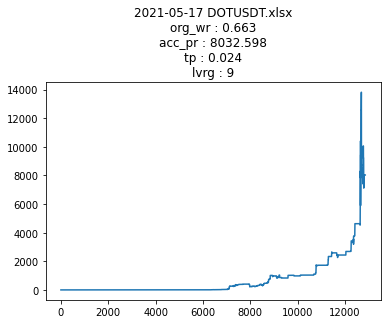

In [ ]:
from tqdm.notebook import tqdm
from funcs_indicator import *
import matplotlib.pyplot as plt

# import mpl_finance as mf


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


start_stamp = 0
# start_stamp = datetime.timestamp(pd.to_datetime('2021-02-12'))
print("start_stamp :", start_stamp)
# break

np.random.shuffle(file_list)
candis = file_list

prev_x = None
total_x = None

seed = 1
random_state = 201
np.random.seed(seed)

fee = 0.0006
lvrg = 1

tp_list = np.arange(0.0, 0.05, 0.001)
lvrg_list = range(1, 10)
lvrg_list = range(3, 7)
lvrg_list = range(6, 10)
lvrg_list = range(9, 10)
# lvrg_list = range(10, 16)
# lvrg_list = range(1, 2)

for i in tqdm(range(len(candis))):

  keys = [candis[i]]

  if 'dot'.upper() not in candis[i]:
    continue

  for key in keys:  
    
    ohlcv = pd.read_excel(date_path + key, index_col=0)
    print('len(ohlcv) :', len(ohlcv))

    #     find best lvrg with lq    #
    for lvrg in lvrg_list:
      
      #       tp opt      #
      best_tp = None
      best_ap = 0
      best_pr = None

      #        find best tp       #
      for tp in tqdm(tp_list):

        long_ep = ohlcv['close'].shift(1) * (1 / (tp + 1))

        #       long      #
        pr = (ohlcv['close'] / long_ep - fee - 1) * lvrg + 1
        #     set condition   #
        pr = np.where(ohlcv['low'] < long_ep, pr, 1)

        #     set constraints     #

        #           fisher 120        #
        fish = fisher(ohlcv, 120)
        pr = np.where(fish.shift(1) > 0, pr, 1)

        # #           ema           #
        # ema = ohlcv['close'].ewm(span=190, min_periods=190-1, adjust=False).mean()
        # # pr = np.where(ohlcv['close'].shift(1) > ema.shift(1), pr, 1)
        # pr = np.where(ema.shift(1) > ema.shift(2), pr, 1)

        #         ma        #
        # ma = ohlcv['close'].rolling(120).mean()
        # pr = np.where(ma.shift(1) > ma.shift(2), pr, 1)

      
        lq = (ohlcv['low'] / long_ep - fee - 1) * lvrg + 1

        # plt.plot(np.cumprod(pr))
        # plt.show()
        # break

        #       fill na with 1.0      #
        pr = np.where(np.isnan(pr), 1, pr)
        # avoid_pr = np.where(np.isnan(avoid_pr), 1, avoid_pr)
        lq = np.where(np.isnan(lq), 1, lq)
        # s_pr = np.where(np.isnan(s_pr), 1, pr)

        #       set lq      #
        pr = np.where((pr != 1) & (lq <= 0), 0, pr)
        # avoid_pr = np.where((avoid_pr != 1) & (lq <= 0), 0, avoid_pr)

        # plt.plot(np.cumprod(pr))
        # plt.title("%.3f" % tp)
        # plt.show()
        # plt.close()

        wr = len(pr[pr > 1]) / len(pr[pr != 1])

        ap = np.cumprod(pr)[-1]
        # if ap >= best_ap:
        if ap >= best_ap and wr > 0.65:
          best_ep = long_ep
          best_ap = ap
          best_tp = tp
          best_pr = pr

      best_pr = np.array(best_pr)
      org_wr = len(best_pr[best_pr > 1]) / len(best_pr[best_pr != 1])

      plt.figure(figsize=(6, 4))
      # plt.subplot(121)
      plt.plot(np.cumprod(best_pr))
      plt.title("%s\norg_wr : %.3f\nacc_pr : %.3f\ntp : %.3f\nlvrg : %s" % (key, org_wr, np.cumprod(best_pr)[-1], best_tp, lvrg))
      
      plt.show()








### find proper constraint

In [ ]:
sar = lucid_sar(ohlcv)
ha_ohlc = heikinashi(ohlcv).iloc[:, :4]
ema1, ema2, ema3 = ema_ribbon(ohlcv)
senkou1, senkou2 = ichimoku(ohlcv)

#### ichimoku

In [ ]:
test_pr = best_pr
plt.plot(np.cumprod(test_pr))
plt.show()
# break

print(len(test_pr))
print(len(ohlcv))

# avoid_pr = np.where(ohlcv['close'].shift(1) > senkou1.shift(1), test_pr, 1)
avoid_pr = np.where(ohlcv['close'].shift(1) > senkou2.shift(1), test_pr, 1)


plt.plot(np.cumprod(avoid_pr))
plt.show()

#### ha_ohlc

In [ ]:
test_pr = best_pr
plt.plot(np.cumprod(test_pr))
plt.show()
# break

print(len(test_pr))
print(len(ohlcv))

avoid_pr = np.where(ha_ohlc['close'].shift(1) < ha_ohlc['open'].shift(1), test_pr, 1)
# avoid_pr = np.where(ha_ohlc['close'].shift(1) > ha_ohlc['close'].shift(2), test_pr, 1)


plt.plot(np.cumprod(avoid_pr))
plt.show()

#### ema

In [ ]:
test_pr = best_pr
plt.plot(np.cumprod(test_pr))
plt.show()
# break

print(len(test_pr))
print(len(ohlcv))

# for ema_period in range(2, 200):
for ema_period in range(200, 300):
# for ema_period in range(121, 200):

  ema = ohlcv['close'].ewm(span=ema_period, min_periods=ema_period - 1, adjust=False).mean()
  # avoid_pr = np.where(ohlcv['close'].shift(1) > ema.shift(1), test_pr, 1)

  avoid_pr = np.where(ema.shift(1) > ema.shift(2), test_pr, 1)


  plt.plot(np.cumprod(avoid_pr))
  plt.title(ema_period)
  plt.show()


#### sar

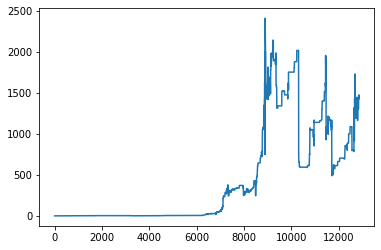

12856
12856


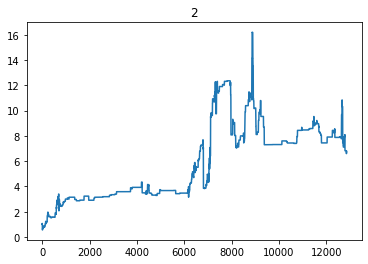

In [ ]:
test_pr = best_pr
plt.plot(np.cumprod(test_pr))
plt.show()
# break

print(len(test_pr))
print(len(ohlcv))

# avoid_pr = np.where(ohlcv['close'].shift(1) < sar.shift(1), test_pr, 1)
avoid_pr = np.where(ohlcv['close'].shift(1) > sar.shift(1), test_pr, 1)

plt.plot(np.cumprod(avoid_pr))
plt.title(ma_period)
plt.show()


#### ma series

In [ ]:
test_pr = best_pr
plt.plot(np.cumprod(test_pr))
plt.show()
# break

print(len(test_pr))
print(len(ohlcv))

#     avoid dropping    #
# for ma_period in range(2, 200):
for ma_period in range(120, 121):
  
  # ma_period = 2

  ma = ohlcv['close'].rolling(ma_period).mean()
  
  # avoid_pr = np.where(ohlcv['close'] > ma, test_pr, 1)
  # avoid_pr = np.where(ohlcv['close'] > ma.shift(1), test_pr, 1)
  # avoid_pr = np.where(ohlcv['close'].shift(1) > ma, test_pr, 1)

  # avoid_pr = np.where(ohlcv['close'].shift(1) > ma.shift(1), test_pr, 1)

  avoid_pr = np.where(ma.shift(1) > ma.shift(2), test_pr, 1)

  # avoid_pr = np.where((ma.shift(1) > ma.shift(2)) & 
  #                     (ma.shift(2) > ma.shift(3)), test_pr, 1)

  avoid_wr = len(avoid_pr[avoid_pr > 1]) / len(avoid_pr[avoid_pr != 1])

  plt.plot(np.cumprod(avoid_pr))
  plt.title('%s\nwr : %.3f' % (ma_period, avoid_wr))
  plt.show()


### constraints v2

In [ ]:
cbo, ema_cbo = cct_bbo(ohlcv, 21, 13) 

_, _, bbw = bb_width(ohlcv, 20, 2) 

fish60 = fisher(ohlcv, 60)
trix = trix_hist(ohlcv, 14, 1, 5) 
rsi_ = rsi(ohlcv)
macd_hist = macd(ohlcv)

In [ ]:
fish30 = fisher(ohlcv, 30)
fish120 = fisher(ohlcv, 120)

#### cbo

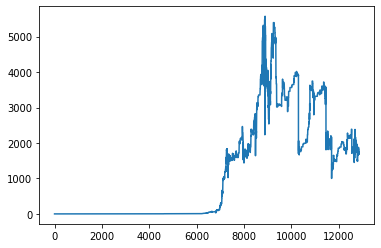

12856
12856


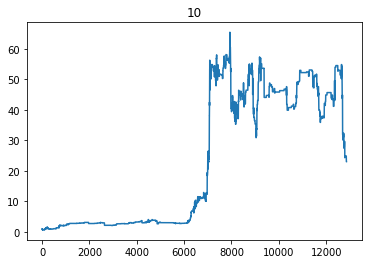

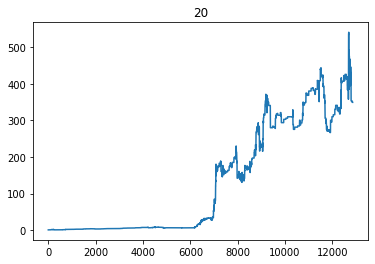

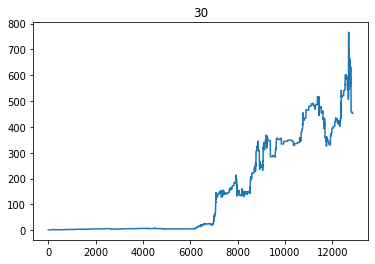

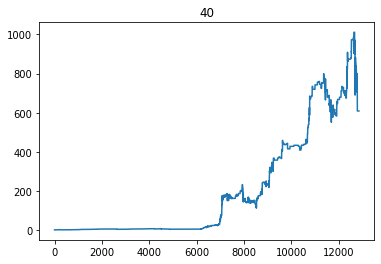

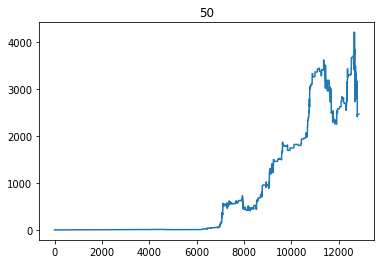

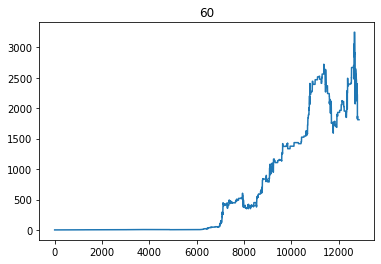

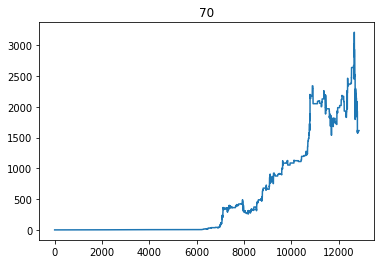

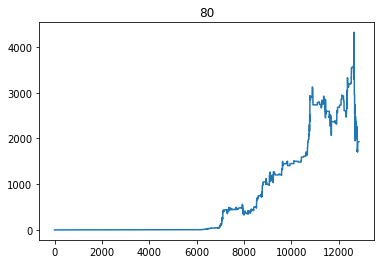

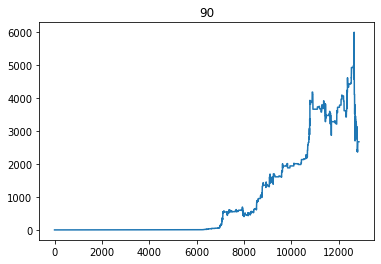

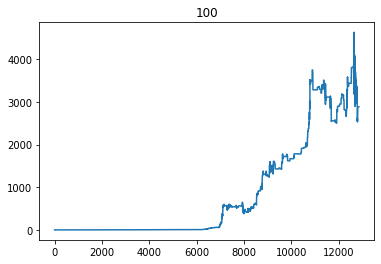

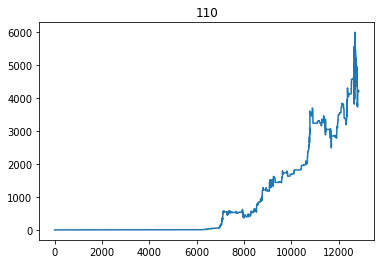

In [ ]:
test_pr = best_pr
plt.plot(np.cumprod(test_pr))
plt.show()
# break

print(len(test_pr))
print(len(ohlcv))


# for f_period in range(115, 125, 1):
for cbo_period in range(10, 120, 10):

  cbo, ema_cbo = cct_bbo(ohlcv, cbo_period, 13) 

  avoid_pr = np.where(ema_cbo.shift(1) > 50, test_pr, 1)

  plt.title(cbo_period)
  plt.plot(np.cumprod(avoid_pr))
  plt.show()

#### fisher

In [ ]:
test_pr = best_pr
plt.plot(np.cumprod(test_pr))
plt.show()
# break

print(len(test_pr))
print(len(ohlcv))


for f_period in range(115, 125, 1):

  fish = fisher(ohlcv, f_period)

  avoid_pr = np.where(fish.shift(1) > 0, test_pr, 1)
  # avoid_pr = np.where(fish30.shift(1) > 0, test_pr, 1)
  # avoid_pr = np.where(fish120.shift(1) > 0, test_pr, 1)
  # avoid_pr = np.where((fish30.shift(1) > 0) & (fish.shift(1) > 0), test_pr, 1)

  plt.title(f_period)
  plt.plot(np.cumprod(avoid_pr))
  plt.show()

#### trix

In [ ]:
test_pr = best_pr
plt.plot(np.cumprod(test_pr))
plt.show()
# break

print(len(test_pr))
print(len(ohlcv))


for f_period in range(115, 125, 1):

  trix = trix_hist(ohlcv, 14, 1, 5) 


  avoid_pr = np.where(fish.shift(1) > 0, test_pr, 1)
  # avoid_pr = np.where(fish30.shift(1) > 0, test_pr, 1)
  # avoid_pr = np.where(fish120.shift(1) > 0, test_pr, 1)
  # avoid_pr = np.where((fish30.shift(1) > 0) & (fish.shift(1) > 0), test_pr, 1)

  plt.title(f_period)
  plt.plot(np.cumprod(avoid_pr))
  plt.show()

### check the logic

In [ ]:
!pip install mpl_finance

In [ ]:
import mpl_finance as mf

print(len(avoid_pr))
print(len(ohlcv))

plot_size = 28
for i in range(plot_size, len(avoid_pr)):
  
  if avoid_pr[i] != 1:

    fig = plt.figure(figsize=(5, 4))

    # ax = fig.add_subplot(211)
    ax = fig.add_subplot(111)

    ind_temp_ohlc = ohlcv.iloc[i + 1 - plot_size:i + 1, :4].values
    # print("ind_temp_ohlcv.shape :", ind_temp_ohlc.shape)

    index = np.arange(len(ind_temp_ohlc))
    candle = np.hstack((np.reshape(index, (-1, 1)), ind_temp_ohlc))
    mf.candlestick_ohlc(ax, candle, width=0.5, colorup='r', colordown='b')

    # plt.plot(ohlcv.iloc[i + 1 - plot_size:i + 1, :4])
    plt.plot(ma.iloc[i + 1 - plot_size:i + 1].values)
    plt.plot(best_ep.iloc[i + 1 - plot_size:i + 1].values)
    plt.title(avoid_pr[i])
    plt.show()
    break

### short

start_stamp : 0


len(ohlcv) : 12856


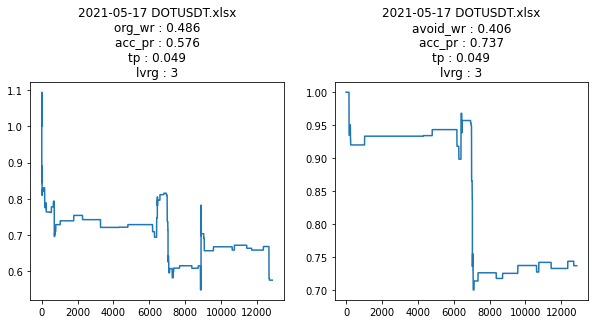

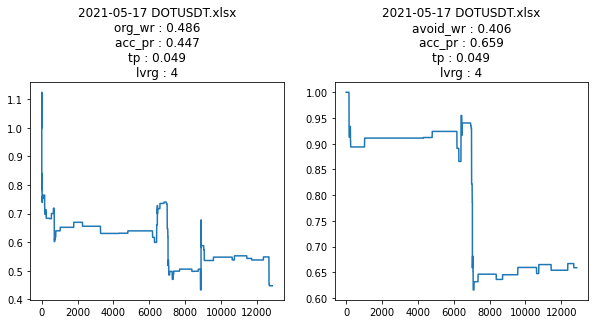

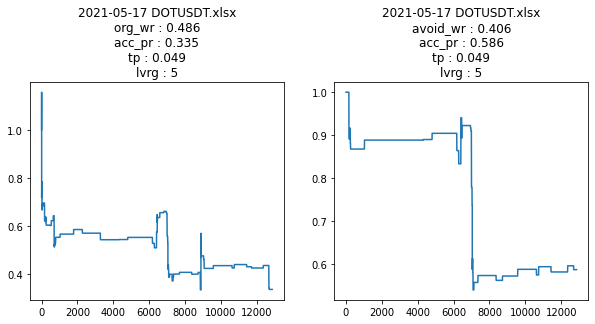

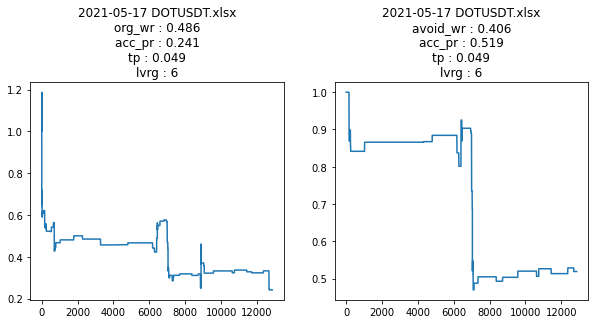

In [ ]:
from tqdm.notebook import tqdm
from funcs_indicator import *
import matplotlib.pyplot as plt

# import mpl_finance as mf


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


start_stamp = 0
# start_stamp = datetime.timestamp(pd.to_datetime('2021-02-12'))
print("start_stamp :", start_stamp)
# break

np.random.shuffle(file_list)
candis = file_list

prev_x = None
total_x = None

seed = 1
random_state = 201
np.random.seed(seed)

fee = 0.0006
lvrg = 1

tp_list = np.arange(0.0, 0.05, 0.001)
lvrg_list = range(1, 10)
lvrg_list = range(3, 7)
# lvrg_list = range(1, 2)

for i in tqdm(range(len(candis))):

  keys = [candis[i]]

  if 'dot'.upper() not in candis[i]:
    continue

  for key in keys:  
    
    ohlcv = pd.read_excel(date_path + key, index_col=0)
    print('len(ohlcv) :', len(ohlcv))

    #     find best lvrg with lq    #
    for lvrg in lvrg_list:
      
      #       tp opt      #
      best_tp = None
      best_ap = 0
      best_pr = None

      #        find best tp       #
      for tp in tp_list:

        # long_ep = ohlcv['close'].shift(1) * (1 / (tp + 1))

        # #       long      #
        # pr = (ohlcv['close'] / long_ep - fee - 1) * lvrg + 1
        # #     set condition   #
        # pr = np.where(ohlcv['low'] < long_ep, pr, 1)
      
        # lq = (ohlcv['low'] / long_ep - fee - 1) * lvrg + 1

        # plt.plot(np.cumprod(pr))
        # plt.show()
        # break

        short_ep = ohlcv['close'].shift(1) * (1 / (1 - tp))

        #       short       #
        pr = (short_ep / ohlcv['close'] - fee - 1) * lvrg + 1
        pr = np.where(ohlcv['high'] > short_ep, pr, 1)

        lq = (short_ep / ohlcv['high'] - fee - 1) * lvrg + 1


        #       fill na with 1.0      #
        pr = np.where(np.isnan(pr), 1, pr)
        # avoid_pr = np.where(np.isnan(avoid_pr), 1, avoid_pr)
        lq = np.where(np.isnan(lq), 1, lq)
        # s_pr = np.where(np.isnan(s_pr), 1, pr)

        #       set lq      #
        pr = np.where((pr != 1) & (lq <= 0), 0, pr)
        # avoid_pr = np.where((avoid_pr != 1) & (lq <= 0), 0, avoid_pr)

        # plt.plot(np.cumprod(pr))
        # plt.title("%.3f" % tp)
        # plt.show()
        # plt.close()

        ap = np.cumprod(pr)[-1]
        if ap >= best_ap:
          best_ap = ap
          best_tp = tp
          best_pr = pr

      best_pr = np.array(best_pr)
      org_wr = len(best_pr[best_pr > 1]) / len(best_pr[best_pr != 1])

      plt.figure(figsize=(10, 4))
      plt.subplot(121)
      plt.plot(np.cumprod(best_pr))
      plt.title("%s\norg_wr : %.3f\nacc_pr : %.3f\ntp : %.3f\nlvrg : %s" % (key, org_wr, np.cumprod(best_pr)[-1], best_tp, lvrg))

      
      #     avoid dropping    #
      ma = ohlcv['close'].rolling(120).mean()
      avoid_pr = np.where(ma.shift(1) > ma.shift(2), best_pr, 1)

      avoid_wr = len(avoid_pr[avoid_pr > 1]) / len(avoid_pr[avoid_pr != 1])

      
      plt.subplot(122)
      plt.plot(np.cumprod(avoid_pr))
      plt.title("%s\navoid_wr : %.3f\nacc_pr : %.3f\ntp : %.3f\nlvrg : %s" % (key, avoid_wr, np.cumprod(avoid_pr)[-1], best_tp, lvrg))

      plt.show()








### dynamic tp

#### stack prev data v2

start_stamp : 0


len(ohlcv) : 12856


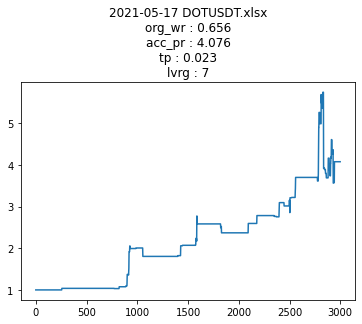

len(back_ohlcv) : 9855


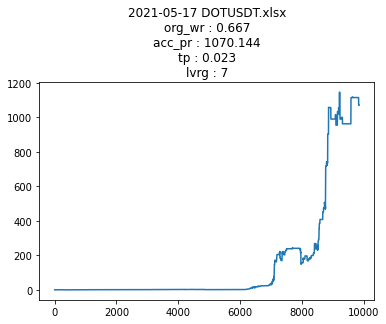

len(back_ohlcv) : 9955


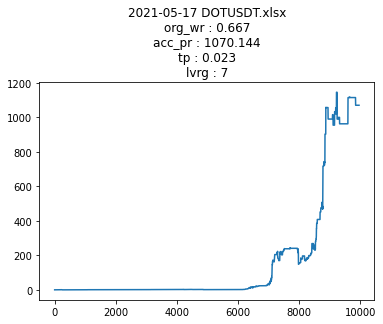

len(back_ohlcv) : 10055


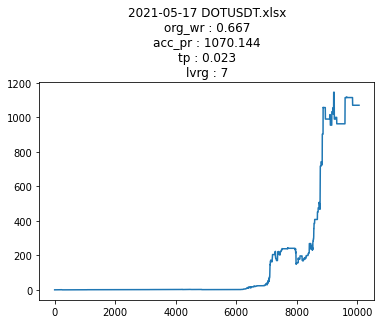

len(back_ohlcv) : 10155


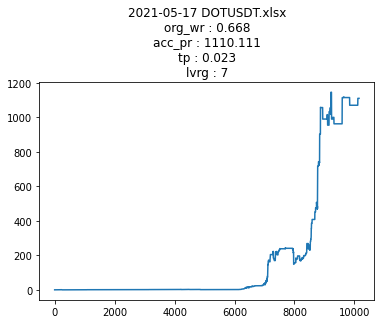

len(back_ohlcv) : 10255


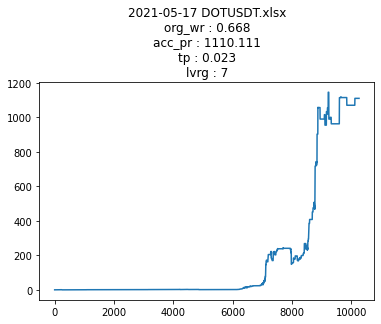

len(back_ohlcv) : 10355


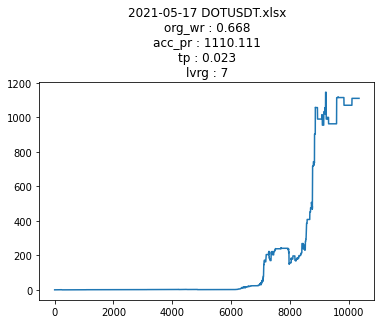

len(back_ohlcv) : 10455


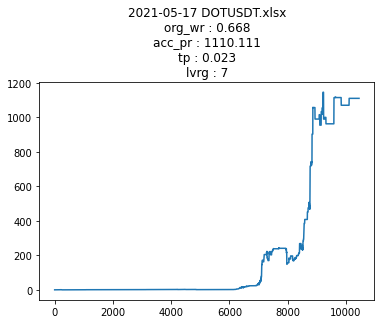

len(back_ohlcv) : 10555


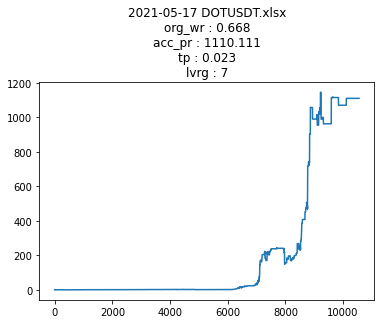

len(back_ohlcv) : 10655


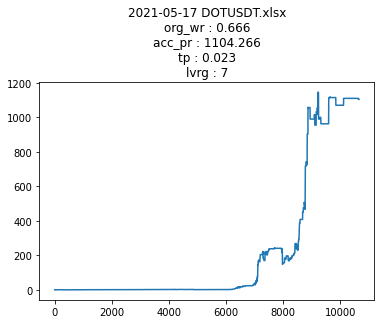

len(back_ohlcv) : 10755


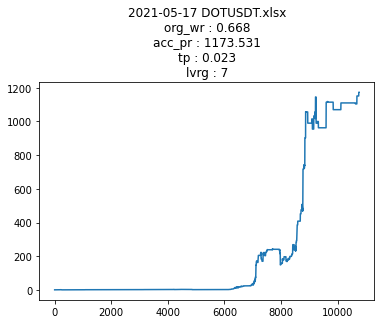

len(back_ohlcv) : 10855


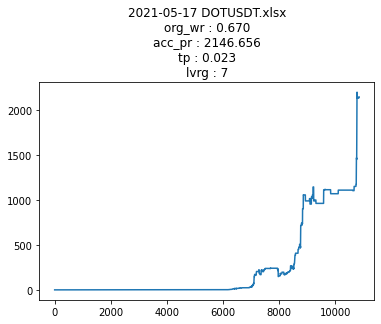

len(back_ohlcv) : 10955


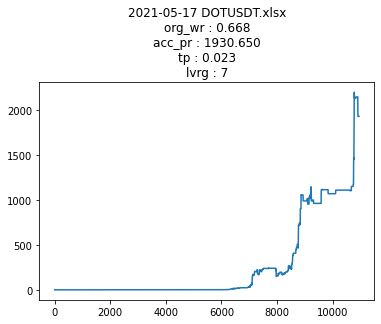

len(back_ohlcv) : 11055


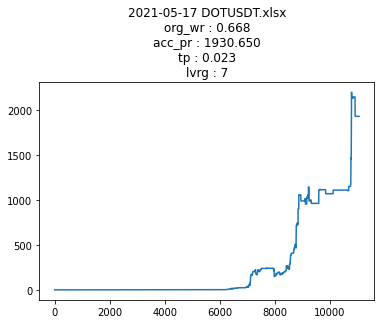

len(back_ohlcv) : 11155


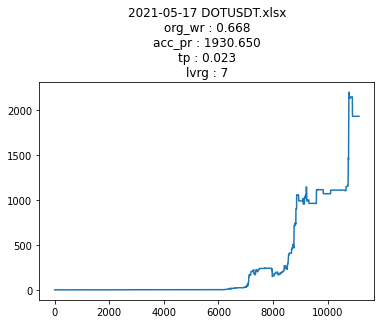

len(back_ohlcv) : 11255


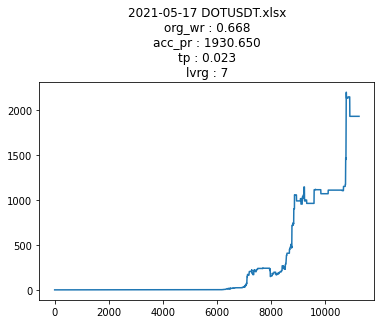

len(back_ohlcv) : 11355


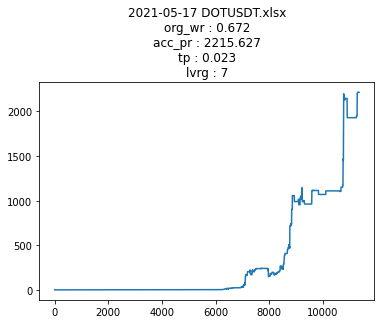

len(back_ohlcv) : 11455


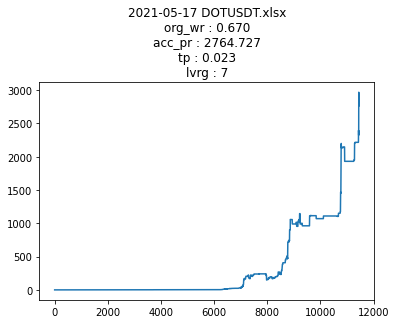

len(back_ohlcv) : 11555


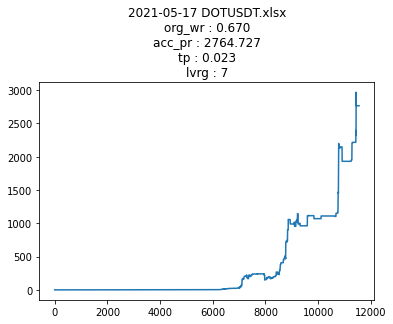

len(back_ohlcv) : 11655


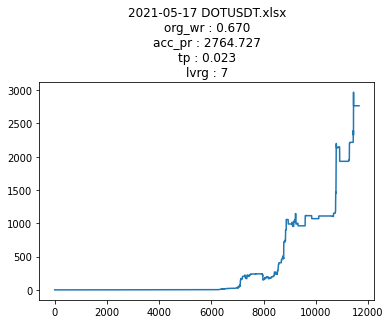

len(back_ohlcv) : 11755


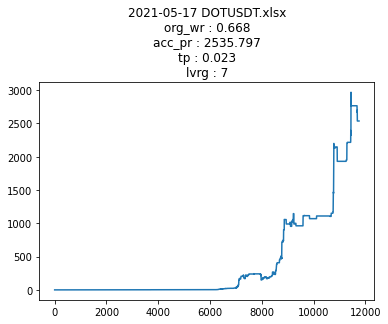

len(back_ohlcv) : 11855


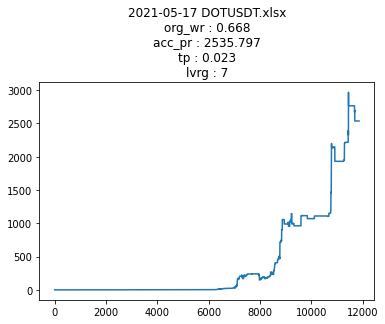

len(back_ohlcv) : 11955


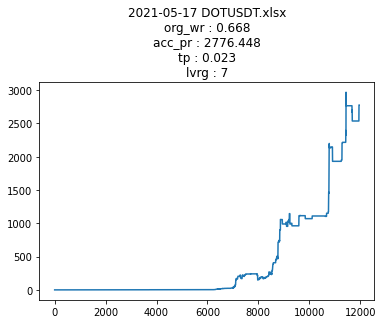

len(back_ohlcv) : 12055


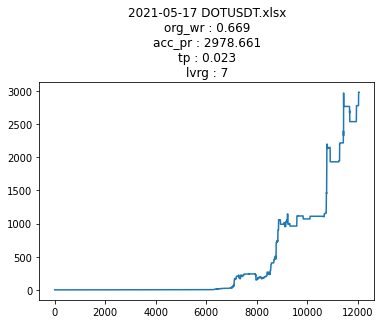

len(back_ohlcv) : 12155


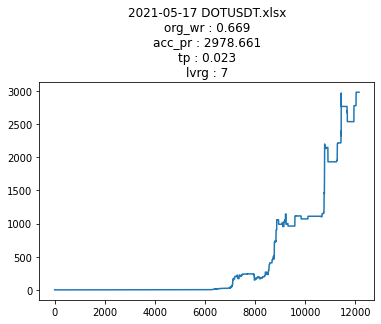

len(back_ohlcv) : 12255


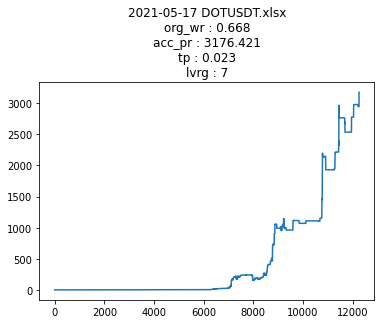

len(back_ohlcv) : 12355


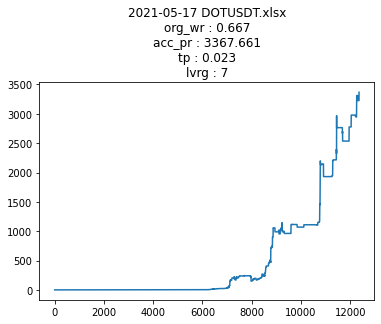

len(back_ohlcv) : 12455


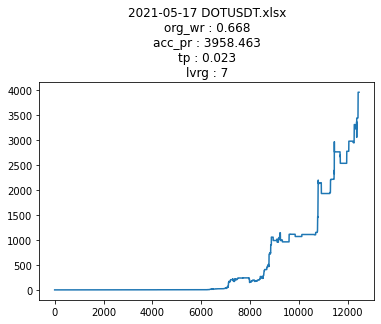

len(back_ohlcv) : 12555


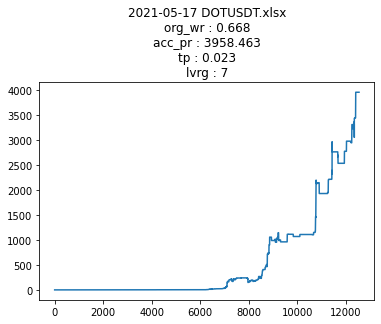

len(back_ohlcv) : 12655


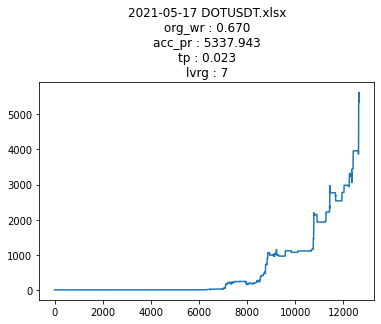

len(back_ohlcv) : 12755


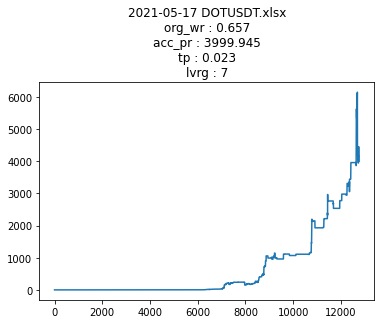

In [ ]:
from tqdm.notebook import tqdm
from funcs_indicator import *
import matplotlib.pyplot as plt

# import mpl_finance as mf


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


start_stamp = 0
# start_stamp = datetime.timestamp(pd.to_datetime('2021-02-12'))
print("start_stamp :", start_stamp)
# break

np.random.shuffle(file_list)
candis = file_list

prev_x = None
total_x = None

seed = 1
random_state = 201
np.random.seed(seed)

fee = 0.0006
lvrg = 1

tp_list = np.arange(0.0, 0.05, 0.001)
lvrg_list = range(1, 10)
lvrg_list = range(1, 2)
lvrg_list = range(7, 8)

for i in tqdm(range(len(candis))):

  keys = [candis[i]]

  if 'dot'.upper() not in candis[i]:
    continue

  for key in keys:  
    
    ohlcv = pd.read_excel(date_path + key, index_col=0)
    print('len(ohlcv) :', len(ohlcv))

    #     find best lvrg with lq    #
    for lvrg in lvrg_list:

      test_size = 3000

      #       do basic survey for comparison      #
      #       tp opt      #
      best_tp = None
      best_ap = 0
      best_pr = None

      #        find best tp       #
      for tp in tp_list:

        long_ep = ohlcv['close'].shift(1) * (1 / (tp + 1))

        #       long      #
        pr = (ohlcv['close'] / long_ep - fee - 1) * lvrg + 1
        #     set condition   #
        pr = np.where(ohlcv['low'] < long_ep, pr, 1)
      
        lq = (ohlcv['low'] / long_ep - fee - 1) * lvrg + 1

        ema = ohlcv['close'].ewm(span=190, min_periods=190-1, adjust=False).mean()
        # pr = np.where(ohlcv['close'].shift(1) > ema.shift(1), pr, 1)
        pr = np.where(ema.shift(1) > ema.shift(2), pr, 1)

        # plt.plot(np.cumprod(pr))
        # plt.show()
        # break

        #       short       #
        # s_pr = (-ohlcv['close'].pct_change() - fee) * lvrg + 1

        #       fill na with 1.0      #
        pr = np.where(np.isnan(pr), 1, pr)
        # avoid_pr = np.where(np.isnan(avoid_pr), 1, avoid_pr)
        lq = np.where(np.isnan(lq), 1, lq)
        # s_pr = np.where(np.isnan(s_pr), 1, pr)

        #       set lq      #
        pr = np.where((pr != 1) & (lq <= 0), 0, pr)
        # avoid_pr = np.where((avoid_pr != 1) & (lq <= 0), 0, avoid_pr)

        # plt.plot(np.cumprod(pr))
        # plt.title("%.3f" % tp)
        # plt.show()
        # plt.close()

        wr = len(pr[pr > 1]) / len(pr[pr != 1])

        ap = np.cumprod(pr)[-1]
        # if ap >= best_ap:
        if ap >= best_ap and wr > 0.65:

          best_ep = long_ep
          best_ap = ap
          best_tp = tp
          best_pr = pr

      best_pr = np.array(best_pr)
      org_wr = len(best_pr[best_pr > 1]) / len(best_pr[best_pr != 1])

      # plt.figure(figsize=(10, 4))
      # plt.subplot(121)
      plt.plot(np.cumprod(best_pr[-test_size:]))
      plt.title("%s\norg_wr : %.3f\nacc_pr : %.3f\ntp : %.3f\nlvrg : %s" % (key, org_wr, np.cumprod(best_pr[-test_size:])[-1], best_tp, lvrg))
      plt.show()


      # look_back_size = 3000
      test_pr_result = []
      best_tp_list = []

      jump_size = 100
      # for t_i in range(test_size):
      for t_i in range(test_size // jump_size):

        # last2_ohlcv = ohlcv.iloc[-test_size + t_i - 1:-test_size + t_i + 1]
    
        #     find best_tp by back ohlcv  #
        # shift_ohlcv = ohlcv.iloc[:-test_size + t_i]
        shift_ohlcv = ohlcv.iloc[:-test_size + jump_size * t_i]
        back_ohlcv = shift_ohlcv.iloc[:-1]

        print("len(back_ohlcv) :", len(back_ohlcv))

        #       tp opt      #
        best_tp = None
        best_ap = 0
        best_pr = None

        #        find best tp       #
        for tp in tp_list:

          long_ep = back_ohlcv['close'].shift(1) * (1 / (tp + 1))

          #       long      #
          pr = (back_ohlcv['close'] / long_ep - fee - 1) * lvrg + 1
          #     set condition   #
          pr = np.where(back_ohlcv['low'] < long_ep, pr, 1)
        
          lq = (back_ohlcv['low'] / long_ep - fee - 1) * lvrg + 1

          ema = back_ohlcv['close'].ewm(span=190, min_periods=190-1, adjust=False).mean()
          # pr = np.where(ohlcv['close'].shift(1) > ema.shift(1), pr, 1)
          pr = np.where(ema.shift(1) > ema.shift(2), pr, 1)


          # plt.plot(np.cumprod(pr))
          # plt.show()
          # break

          #       short       #
          # s_pr = (-back_ohlcv['close'].pct_change() - fee) * lvrg + 1

          #       fill na with 1.0      #
          pr = np.where(np.isnan(pr), 1, pr)
          # avoid_pr = np.where(np.isnan(avoid_pr), 1, avoid_pr)
          lq = np.where(np.isnan(lq), 1, lq)
          # s_pr = np.where(np.isnan(s_pr), 1, pr)

          #       set lq      #
          pr = np.where((pr != 1) & (lq <= 0), 0, pr)
          # avoid_pr = np.where((avoid_pr != 1) & (lq <= 0), 0, avoid_pr)

          # plt.plot(np.cumprod(pr))
          # plt.title("%.3f" % tp)
          # plt.show()
          # plt.close()
          wr = len(pr[pr > 1]) / len(pr[pr != 1])

          ap = np.cumprod(pr)[-1]
          # if ap >= best_ap:
          if ap >= best_ap and wr > 0.65:
            
            best_ap = ap
            best_tp = tp
            best_pr = pr

        best_pr = np.array(best_pr)
        org_wr = len(best_pr[best_pr > 1]) / len(best_pr[best_pr != 1])

        # plt.figure(figsize=(10, 4))
        # plt.subplot(121)
        plt.plot(np.cumprod(best_pr))
        plt.title("%s\norg_wr : %.3f\nacc_pr : %.3f\ntp : %.3f\nlvrg : %s" % (key, org_wr, np.cumprod(best_pr)[-1], best_tp, lvrg))
        plt.show()

        
        # best_tp_list.append(best_tp)
        # best_pr = np.array(best_pr)
        # # org_wr = len(best_pr[best_pr > 1]) / len(best_pr[best_pr != 1])

        # # print("best_tp :", best_tp)

        # #       adjust best_tp to the current ohlcv     #
        # long_ep = shift_ohlcv['close'].shift(1) * (1 / (best_tp + 1))

        # pr = (shift_ohlcv['close'] / long_ep - fee - 1) * lvrg + 1
        # #     set condition   #
        # pr = np.where(shift_ohlcv['low'] < long_ep, pr, 1)
      
        # lq = (shift_ohlcv['low'] / long_ep - fee - 1) * lvrg + 1

        # # plt.plot(np.cumprod(pr))
        # # plt.show()
        # # break

        # #       fill na with 1.0      #
        # pr = np.where(np.isnan(pr), 1, pr)
        # # avoid_pr = np.where(np.isnan(avoid_pr), 1, avoid_pr)
        # lq = np.where(np.isnan(lq), 1, lq)
        # # s_pr = np.where(np.isnan(s_pr), 1, pr)

        # #       set lq      #
        # pr = np.where((pr != 1) & (lq <= 0), 0, pr)

        # if pr[-1] == 0:
          
        #   print("pr :", pr)
        #   print("lq :", lq)
        #   print("best_tp :", best_tp)
        #   break

        # # plt.figure(figsize=(10, 4))
        # # plt.subplot(121)
        # # plt.plot(np.cumprod(best_pr))
        # # plt.title("%s\norg_wr : %.3f\nacc_pr : %.3f\ntp : %.3f\nlvrg : %s" % (key, org_wr, np.cumprod(best_pr)[-1], best_tp, lvrg))
       
        # test_pr_result.append(pr[-1])

      # print("len(test_pr_result) :", len(test_pr_result))

      # test_pr_result = np.array(test_pr_result)

      # wr = len(test_pr_result[test_pr_result > 1]) / len(test_pr_result[test_pr_result != 1])

      # plt.plot(np.cumprod(test_pr_result))
      # plt.title("%s\nwr : %.3f\nacc_pr : %.3f\nlvrg : %s" % (key, wr, np.cumprod(test_pr_result)[-1],lvrg))

      # plt.show()

      # plt.plot(best_tp_list)
      # plt.title("best_tp_list")

      # plt.show()


#### stack prev data

start_stamp : 0


len(ohlcv) : 12856


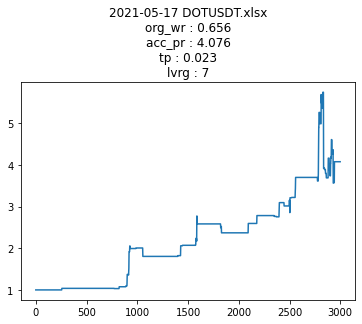

pr : [1. 0.]
lq : [ 1.         -0.15390719]
best_tp : 0.023
len(test_pr_result) : 446


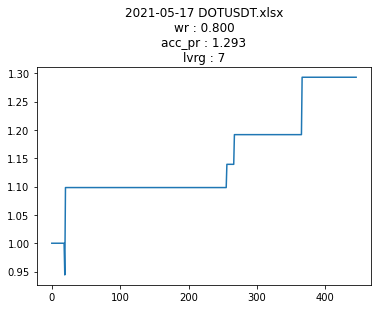

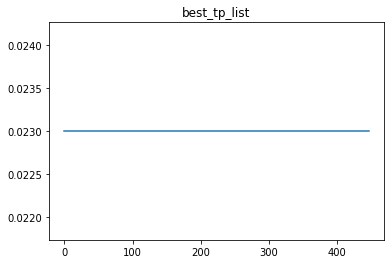

In [ ]:
from tqdm.notebook import tqdm
from funcs_indicator import *
import matplotlib.pyplot as plt

# import mpl_finance as mf


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


start_stamp = 0
# start_stamp = datetime.timestamp(pd.to_datetime('2021-02-12'))
print("start_stamp :", start_stamp)
# break

np.random.shuffle(file_list)
candis = file_list

prev_x = None
total_x = None

seed = 1
random_state = 201
np.random.seed(seed)

fee = 0.0006
lvrg = 1

tp_list = np.arange(0.0, 0.05, 0.001)
lvrg_list = range(1, 10)
lvrg_list = range(1, 2)
lvrg_list = range(7, 8)

for i in tqdm(range(len(candis))):

  keys = [candis[i]]

  if 'dot'.upper() not in candis[i]:
    continue

  for key in keys:  
    
    ohlcv = pd.read_excel(date_path + key, index_col=0)
    print('len(ohlcv) :', len(ohlcv))

    #     find best lvrg with lq    #
    for lvrg in lvrg_list:

      test_size = 3000

      #       do basic survey for comparison      #
      #       tp opt      #
      best_tp = None
      best_ap = 0
      best_pr = None

      #        find best tp       #
      for tp in tp_list:

        long_ep = ohlcv['close'].shift(1) * (1 / (tp + 1))

        #       long      #
        pr = (ohlcv['close'] / long_ep - fee - 1) * lvrg + 1
        #     set condition   #
        pr = np.where(ohlcv['low'] < long_ep, pr, 1)
      
        lq = (ohlcv['low'] / long_ep - fee - 1) * lvrg + 1

        ema = ohlcv['close'].ewm(span=190, min_periods=190-1, adjust=False).mean()
        # pr = np.where(ohlcv['close'].shift(1) > ema.shift(1), pr, 1)
        pr = np.where(ema.shift(1) > ema.shift(2), pr, 1)

        # plt.plot(np.cumprod(pr))
        # plt.show()
        # break

        #       short       #
        # s_pr = (-ohlcv['close'].pct_change() - fee) * lvrg + 1

        #       fill na with 1.0      #
        pr = np.where(np.isnan(pr), 1, pr)
        # avoid_pr = np.where(np.isnan(avoid_pr), 1, avoid_pr)
        lq = np.where(np.isnan(lq), 1, lq)
        # s_pr = np.where(np.isnan(s_pr), 1, pr)

        #       set lq      #
        pr = np.where((pr != 1) & (lq <= 0), 0, pr)
        # avoid_pr = np.where((avoid_pr != 1) & (lq <= 0), 0, avoid_pr)

        # plt.plot(np.cumprod(pr))
        # plt.title("%.3f" % tp)
        # plt.show()
        # plt.close()

        wr = len(pr[pr > 1]) / len(pr[pr != 1])

        ap = np.cumprod(pr)[-1]
        # if ap >= best_ap:
        if ap >= best_ap and wr > 0.65:

          best_ep = long_ep
          best_ap = ap
          best_tp = tp
          best_pr = pr

      best_pr = np.array(best_pr)
      org_wr = len(best_pr[best_pr > 1]) / len(best_pr[best_pr != 1])

      # plt.figure(figsize=(10, 4))
      # plt.subplot(121)
      plt.plot(np.cumprod(best_pr[-test_size:]))
      plt.title("%s\norg_wr : %.3f\nacc_pr : %.3f\ntp : %.3f\nlvrg : %s" % (key, org_wr, np.cumprod(best_pr[-test_size:])[-1], best_tp, lvrg))
      plt.show()


      # look_back_size = 3000
      test_pr_result = []
      best_tp_list = []

      for t_i in tqdm(range(test_size - 1)):

        last2_ohlcv = ohlcv.iloc[-test_size + t_i - 1:-test_size + t_i + 1]
    
        #     find best_tp by back ohlcv  #
        back_ohlcv = ohlcv.iloc[:-test_size + t_i]

        #       tp opt      #
        best_tp = None
        best_ap = 0
        best_pr = None

        #        find best tp       #
        for tp in tp_list:

          long_ep = back_ohlcv['close'].shift(1) * (1 / (tp + 1))

          #       long      #
          pr = (back_ohlcv['close'] / long_ep - fee - 1) * lvrg + 1
          #     set condition   #
          pr = np.where(back_ohlcv['low'] < long_ep, pr, 1)
        
          lq = (back_ohlcv['low'] / long_ep - fee - 1) * lvrg + 1

          ema = back_ohlcv['close'].ewm(span=190, min_periods=190-1, adjust=False).mean()
          # pr = np.where(ohlcv['close'].shift(1) > ema.shift(1), pr, 1)
          pr = np.where(ema.shift(1) > ema.shift(2), pr, 1)


          # plt.plot(np.cumprod(pr))
          # plt.show()
          # break

          #       short       #
          # s_pr = (-back_ohlcv['close'].pct_change() - fee) * lvrg + 1

          #       fill na with 1.0      #
          pr = np.where(np.isnan(pr), 1, pr)
          # avoid_pr = np.where(np.isnan(avoid_pr), 1, avoid_pr)
          lq = np.where(np.isnan(lq), 1, lq)
          # s_pr = np.where(np.isnan(s_pr), 1, pr)

          #       set lq      #
          pr = np.where((pr != 1) & (lq <= 0), 0, pr)
          # avoid_pr = np.where((avoid_pr != 1) & (lq <= 0), 0, avoid_pr)

          # plt.plot(np.cumprod(pr))
          # plt.title("%.3f" % tp)
          # plt.show()
          # plt.close()
          wr = len(pr[pr > 1]) / len(pr[pr != 1])

          ap = np.cumprod(pr)[-1]
          # if ap >= best_ap:
          if ap >= best_ap and wr > 0.65:
            
            best_ap = ap
            best_tp = tp
            best_pr = pr

        
        best_tp_list.append(best_tp)
        best_pr = np.array(best_pr)
        # org_wr = len(best_pr[best_pr > 1]) / len(best_pr[best_pr != 1])

        # print("best_tp :", best_tp)

        long_ep = last2_ohlcv['close'].shift(1) * (1 / (best_tp + 1))

        pr = (last2_ohlcv['close'] / long_ep - fee - 1) * lvrg + 1
        #     set condition   #
        pr = np.where(last2_ohlcv['low'] < long_ep, pr, 1)
      
        lq = (last2_ohlcv['low'] / long_ep - fee - 1) * lvrg + 1

        # plt.plot(np.cumprod(pr))
        # plt.show()
        # break

        #       fill na with 1.0      #
        pr = np.where(np.isnan(pr), 1, pr)
        # avoid_pr = np.where(np.isnan(avoid_pr), 1, avoid_pr)
        lq = np.where(np.isnan(lq), 1, lq)
        # s_pr = np.where(np.isnan(s_pr), 1, pr)

        #       set lq      #
        pr = np.where((pr != 1) & (lq <= 0), 0, pr)

        if pr[-1] == 0:
          
          print("pr :", pr)
          print("lq :", lq)
          print("best_tp :", best_tp)
          break

        # plt.figure(figsize=(10, 4))
        # plt.subplot(121)
        # plt.plot(np.cumprod(best_pr))
        # plt.title("%s\norg_wr : %.3f\nacc_pr : %.3f\ntp : %.3f\nlvrg : %s" % (key, org_wr, np.cumprod(best_pr)[-1], best_tp, lvrg))
       
        test_pr_result.append(pr[-1])

      print("len(test_pr_result) :", len(test_pr_result))

      test_pr_result = np.array(test_pr_result)

      wr = len(test_pr_result[test_pr_result > 1]) / len(test_pr_result[test_pr_result != 1])

      plt.plot(np.cumprod(test_pr_result))
      plt.title("%s\nwr : %.3f\nacc_pr : %.3f\nlvrg : %s" % (key, wr, np.cumprod(test_pr_result)[-1],lvrg))

      plt.show()

      plt.plot(best_tp_list)
      plt.title("best_tp_list")

      plt.show()


In [ ]:
test_pr_result = np.array(test_pr_result)

wr = len(test_pr_result[test_pr_result > 1]) / len(test_pr_result[test_pr_result != 1])

plt.plot(np.cumprod(test_pr_result))
plt.title("%s\wr : %.3f\nacc_pr : %.3f\nlvrg : %s" % (key, wr, np.cumprod(test_pr_result)[-1],lvrg))

plt.show()

plt.plot(best_tp_list)
plt.title("best_tp_list")

plt.show()

#### local opt

start_stamp : 0


len(ohlcv) : 12856



len(test_pr_result) : 2999


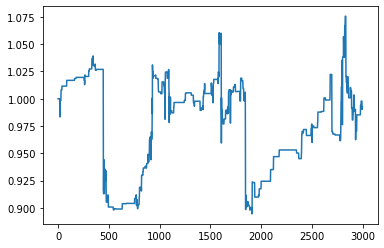

In [ ]:
from tqdm.notebook import tqdm
from funcs_indicator import *
import matplotlib.pyplot as plt

# import mpl_finance as mf


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


start_stamp = 0
# start_stamp = datetime.timestamp(pd.to_datetime('2021-02-12'))
print("start_stamp :", start_stamp)
# break

np.random.shuffle(file_list)
candis = file_list

prev_x = None
total_x = None

seed = 1
random_state = 201
np.random.seed(seed)

fee = 0.0006
lvrg = 1

tp_list = np.arange(0.0, 0.05, 0.001)
lvrg_list = range(1, 10)
lvrg_list = range(1, 2)

for i in tqdm(range(len(candis))):

  keys = [candis[i]]

  if 'dot'.upper() not in candis[i]:
    continue

  for key in keys:  
    
    ohlcv = pd.read_excel(date_path + key, index_col=0)
    print('len(ohlcv) :', len(ohlcv))

    #     find best lvrg with lq    #
    for lvrg in lvrg_list:

      test_size = 3000
      look_back_size = 3000
      test_pr_result = []

      for t_i in tqdm(range(test_size - 1)):

        last2_ohlcv = ohlcv.iloc[-test_size + t_i - 1:-test_size + t_i + 1]
    
        #     find best_tp by back ohlcv  #

        back_ohlcv = ohlcv.iloc[-test_size - look_back_size + t_i:-test_size + t_i]

        #       tp opt      #
        best_tp = None
        best_ap = 0
        best_pr = None

        #        find best tp       #
        for tp in tp_list:

          long_ep = back_ohlcv['close'].shift(1) * (1 / (tp + 1))

          #       long      #
          pr = (back_ohlcv['close'] / long_ep - fee - 1) * lvrg + 1
          #     set condition   #
          pr = np.where(back_ohlcv['low'] < long_ep, pr, 1)
        
          lq = (back_ohlcv['low'] / long_ep - fee - 1) * lvrg + 1

          # plt.plot(np.cumprod(pr))
          # plt.show()
          # break

          #       short       #
          # s_pr = (-back_ohlcv['close'].pct_change() - fee) * lvrg + 1

          #       fill na with 1.0      #
          pr = np.where(np.isnan(pr), 1, pr)
          # avoid_pr = np.where(np.isnan(avoid_pr), 1, avoid_pr)
          lq = np.where(np.isnan(lq), 1, lq)
          # s_pr = np.where(np.isnan(s_pr), 1, pr)

          #       set lq      #
          pr = np.where((pr != 1) & (lq <= 0), 0, pr)
          # avoid_pr = np.where((avoid_pr != 1) & (lq <= 0), 0, avoid_pr)

          # plt.plot(np.cumprod(pr))
          # plt.title("%.3f" % tp)
          # plt.show()
          # plt.close()

          ap = np.cumprod(pr)[-1]
          if ap >= best_ap:
            best_ap = ap
            best_tp = tp
            best_pr = pr

        best_pr = np.array(best_pr)
        org_wr = len(best_pr[best_pr > 1]) / len(best_pr[best_pr != 1])

        # print("best_tp :", best_tp)

        long_ep = last2_ohlcv['close'].shift(1) * (1 / (best_tp + 1))

        pr = (last2_ohlcv['close'] / long_ep - fee - 1) * lvrg + 1
        #     set condition   #
        pr = np.where(last2_ohlcv['low'] < long_ep, pr, 1)
      
        lq = (last2_ohlcv['low'] / long_ep - fee - 1) * lvrg + 1

        # plt.plot(np.cumprod(pr))
        # plt.show()
        # break

        #       fill na with 1.0      #
        pr = np.where(np.isnan(pr), 1, pr)
        # avoid_pr = np.where(np.isnan(avoid_pr), 1, avoid_pr)
        lq = np.where(np.isnan(lq), 1, lq)
        # s_pr = np.where(np.isnan(s_pr), 1, pr)

        #       set lq      #
        pr = np.where((pr != 1) & (lq <= 0), 0, pr)

        # plt.figure(figsize=(10, 4))
        # plt.subplot(121)
        # plt.plot(np.cumprod(best_pr))
        # plt.title("%s\norg_wr : %.3f\nacc_pr : %.3f\ntp : %.3f\nlvrg : %s" % (key, org_wr, np.cumprod(best_pr)[-1], best_tp, lvrg))

        
        # #     avoid dropping    #
        # # ma = back_ohlcv['close'].rolling(120).mean()
        # # avoid_pr = np.where(ma.shift(1) > ma.shift(2), best_pr, 1)

        # # avoid_wr = len(avoid_pr[avoid_pr > 1]) / len(avoid_pr[avoid_pr != 1])

        
        # # plt.subplot(122)
        # # plt.plot(np.cumprod(avoid_pr))
        # # plt.title("%s\navoid_wr : %.3f\nacc_pr : %.3f\ntp : %.3f\nlvrg : %s" % (key, avoid_wr, np.cumprod(avoid_pr)[-1], best_tp, lvrg))

        # plt.show()

        test_pr_result.append(pr[-1])

      print("len(test_pr_result) :", len(test_pr_result))

      plt.plot(np.cumprod(test_pr_result))
      plt.show()








Text(0.5, 1.0, '2021-05-17 DOTUSDT.xlsx\norg_wr : 0.613\nacc_pr : 1.187\ntp : 0.023\nlvrg : 1')

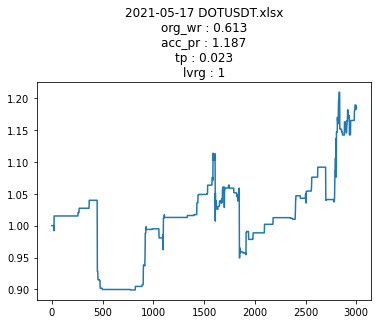

In [ ]:
plt.plot(np.cumprod(best_pr[-test_size:]))
plt.title("%s\norg_wr : %.3f\nacc_pr : %.3f\ntp : %.3f\nlvrg : %s" % (key, org_wr, np.cumprod(best_pr)[-1], best_tp, lvrg))


#### check flucutation

len(ohlcv) : 18984


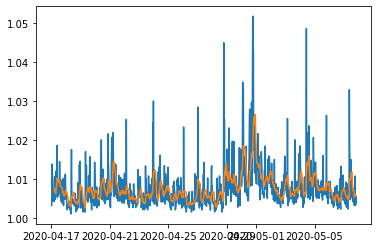

In [ ]:
   
ohlcv = pd.read_excel(date_path + key, index_col=0)
print('len(ohlcv) :', len(ohlcv))

fluc = ohlcv['high'] / ohlcv['low']

ma_period = 10
fluc_ma = fluc.rolling(ma_period).mean()

# plt.plot(ohlcv['close'])
plot_size = 1000
plt.plot(fluc[:plot_size])
plt.plot(fluc_ma[:plot_size])
plt.show()

start_stamp : 0


len(ohlcv) : 18984


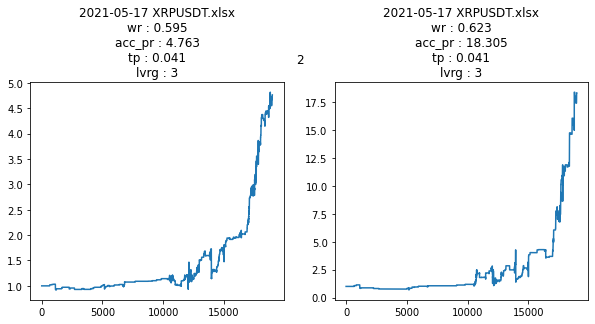

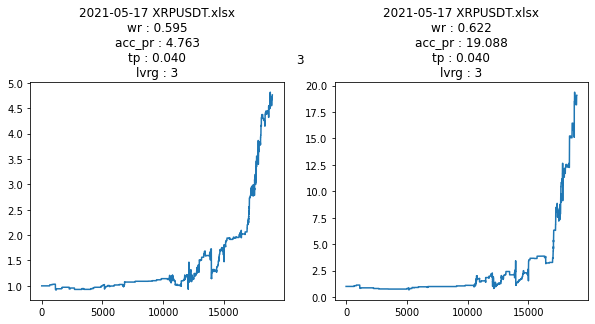

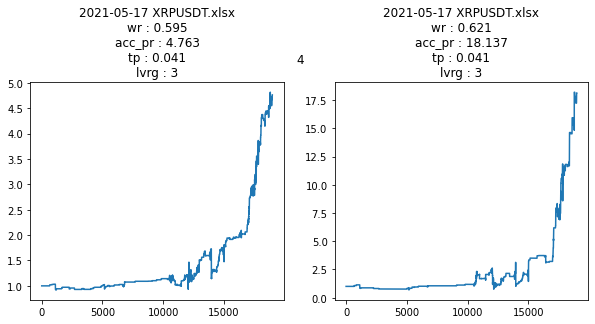

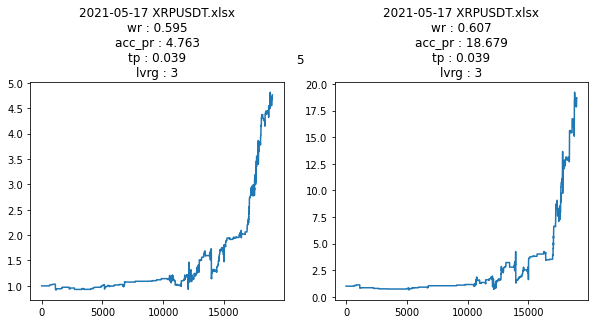

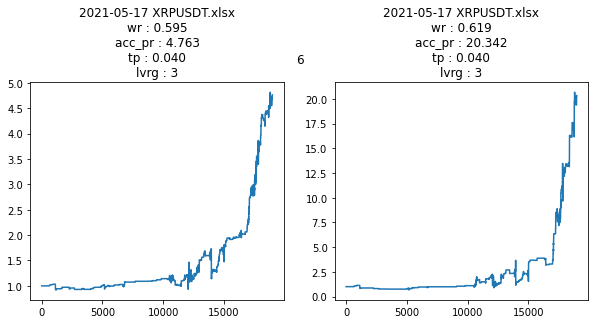

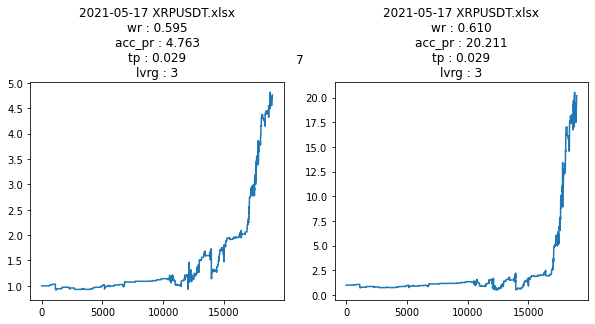

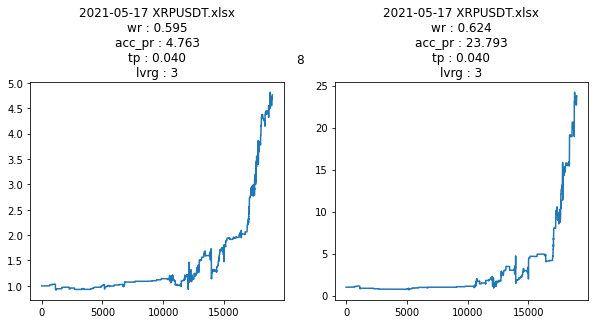

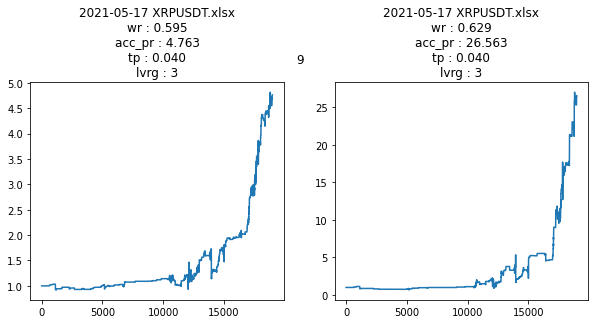

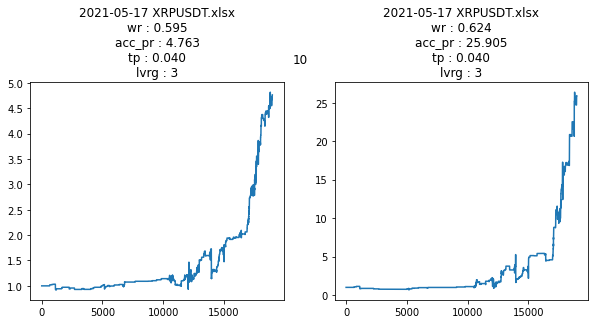

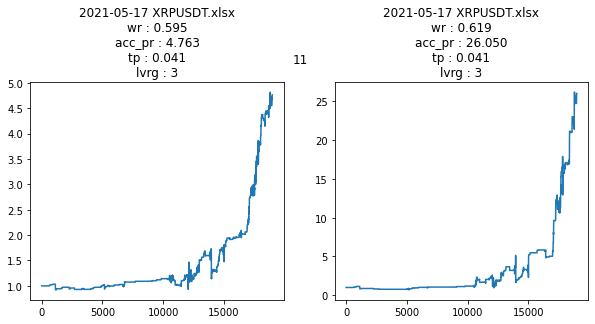

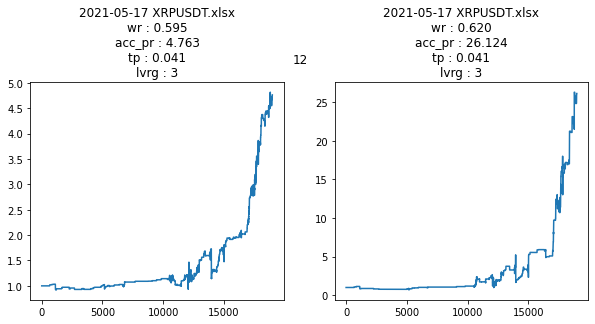

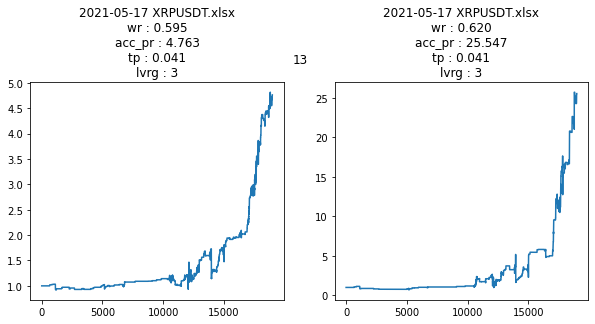

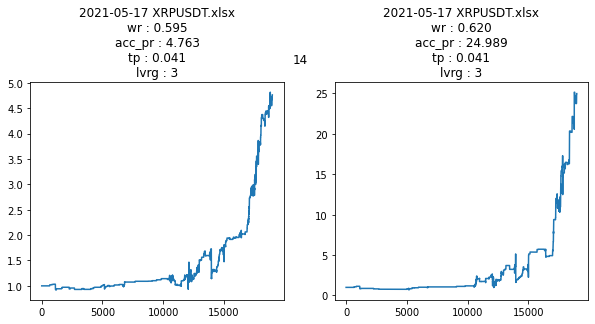

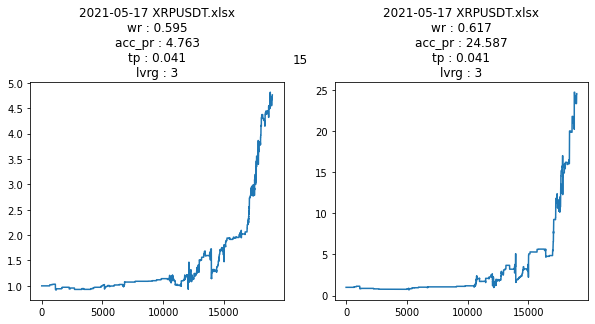

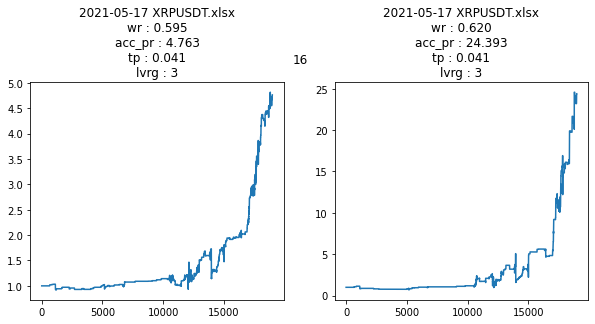

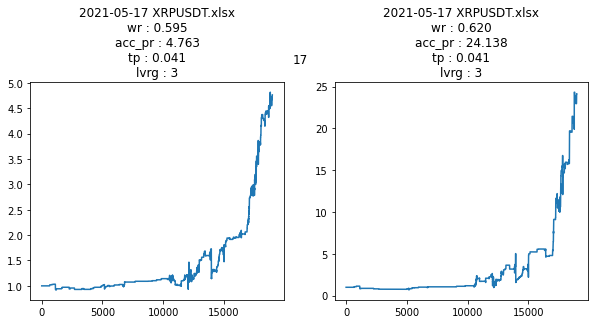

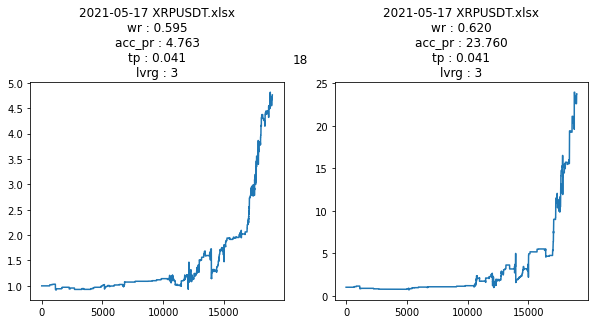

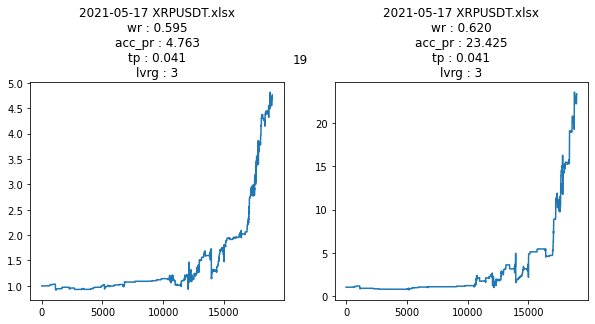

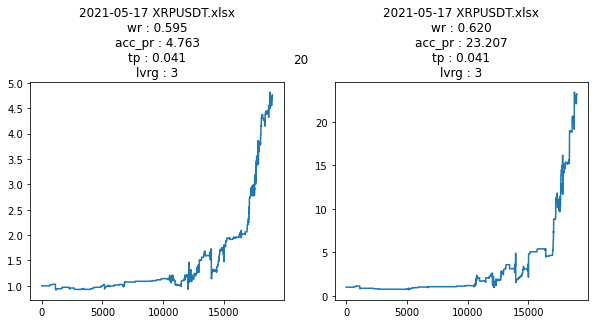

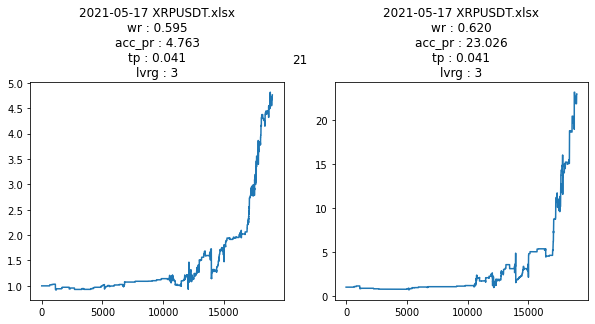

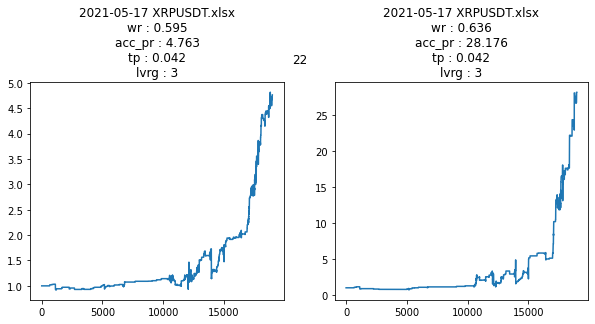

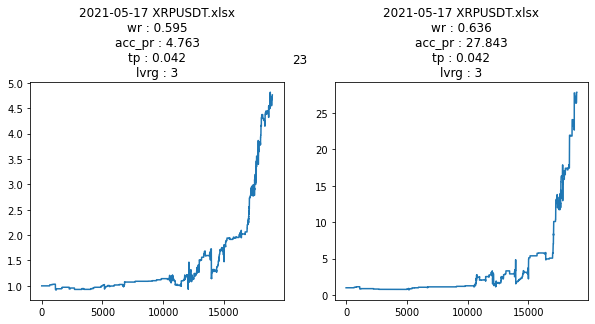

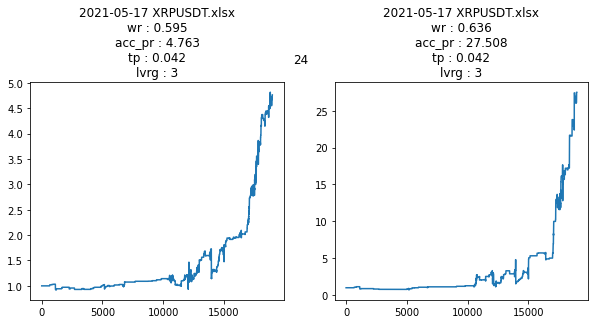

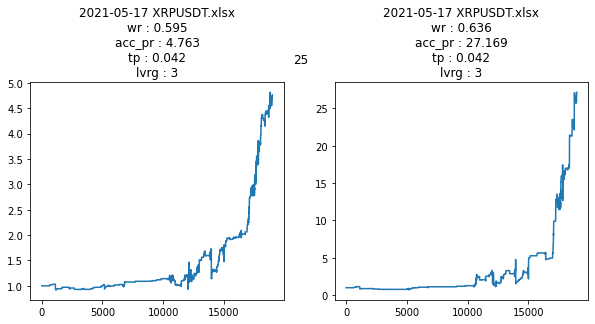

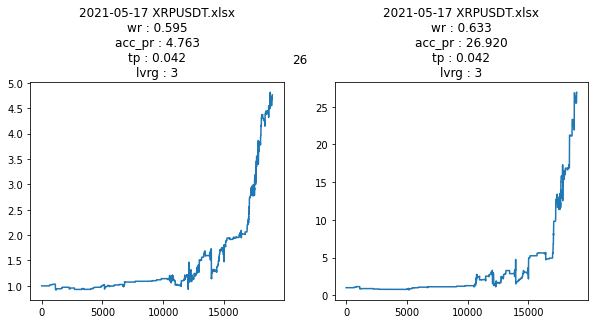

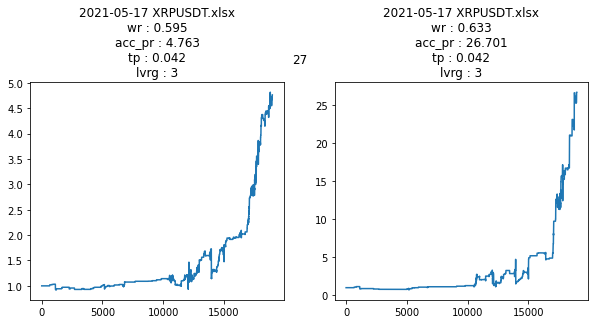

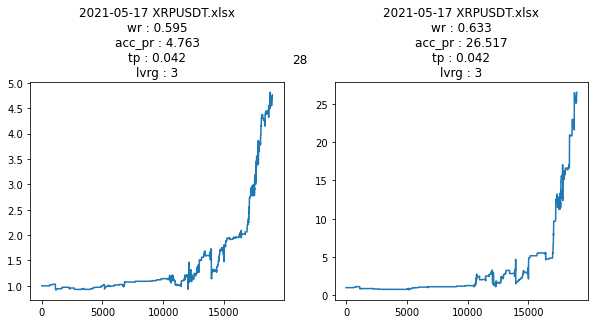

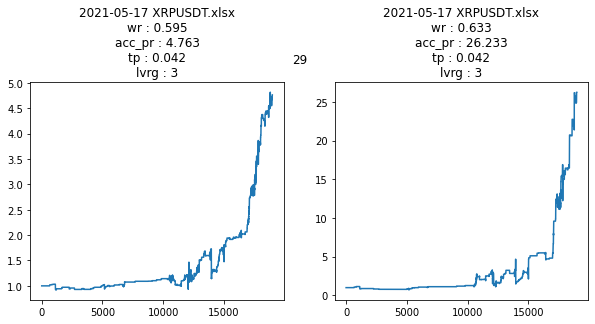

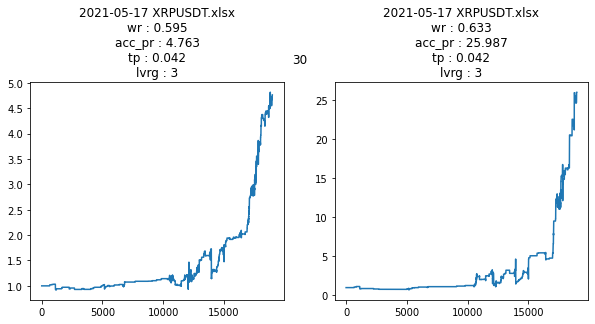

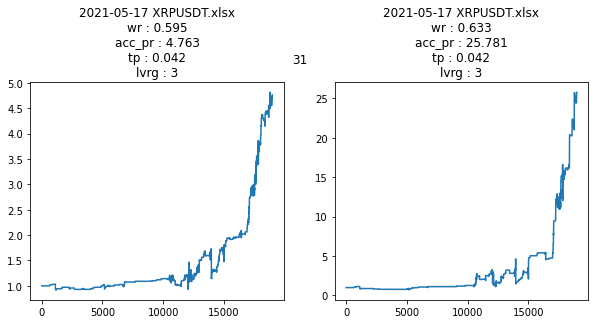

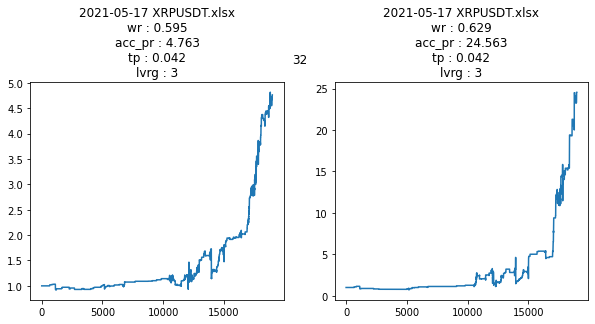

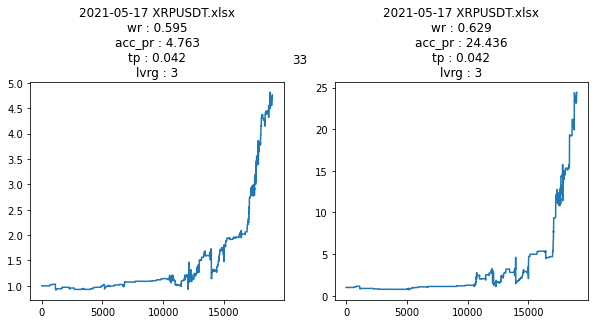

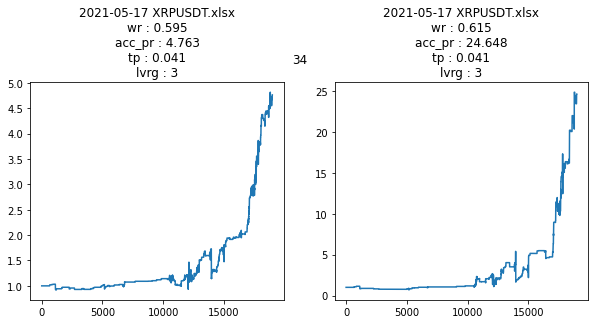

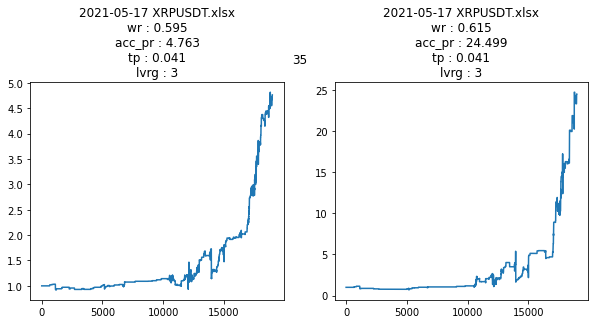

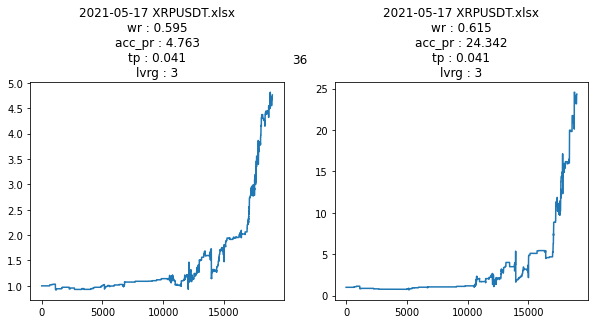

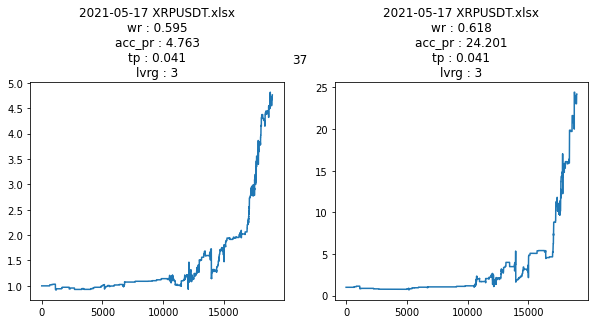

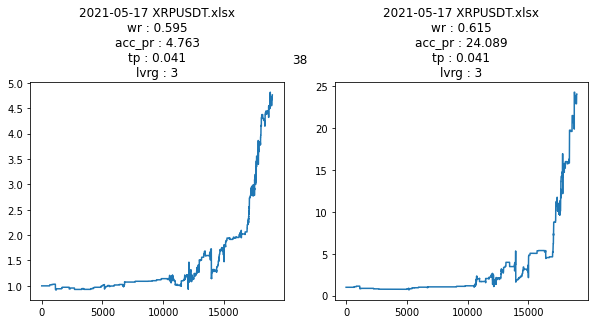

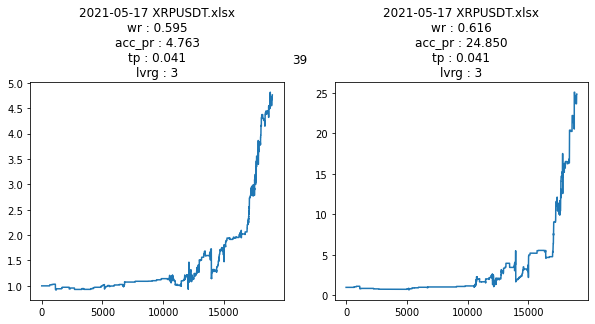

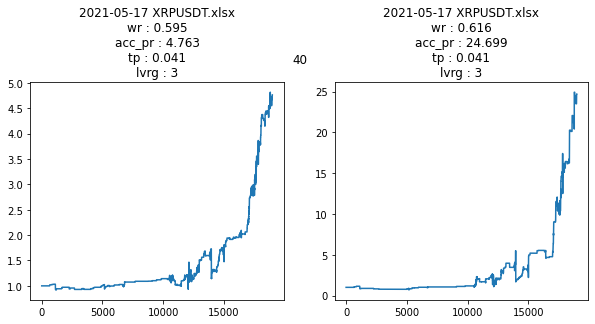

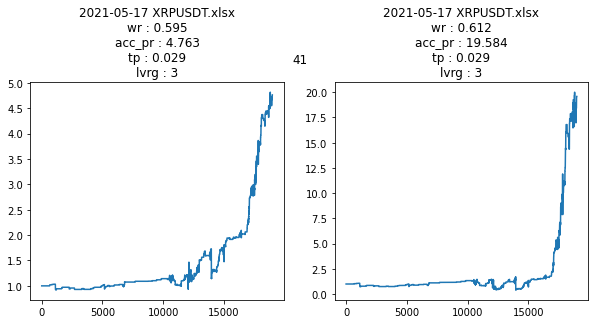

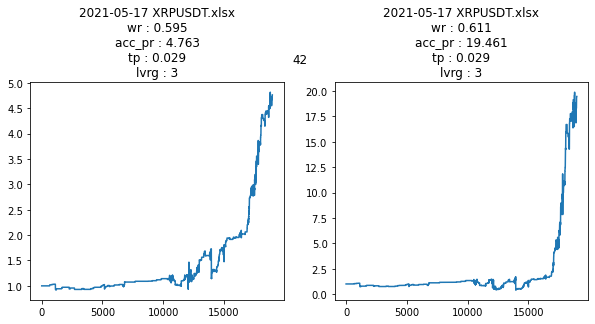

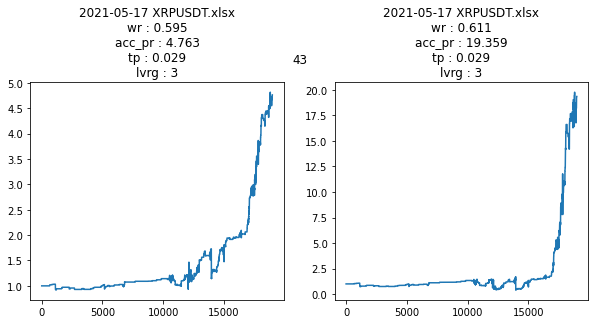

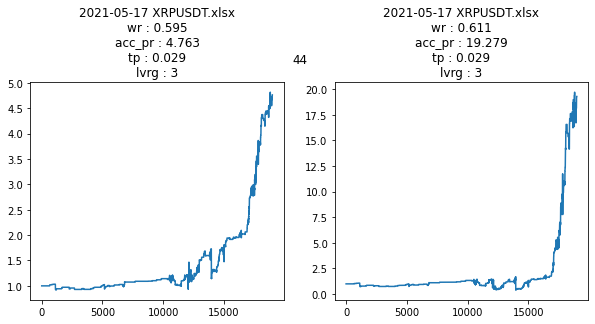

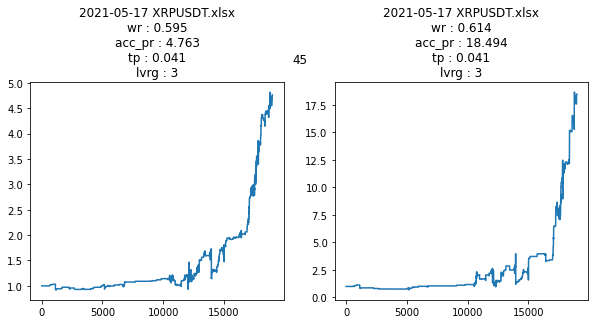

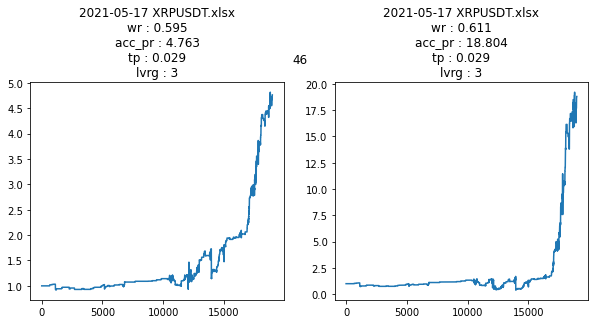

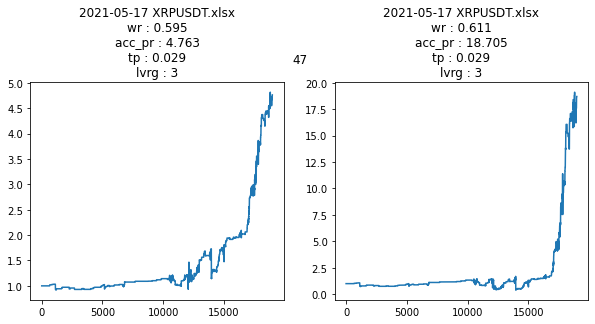

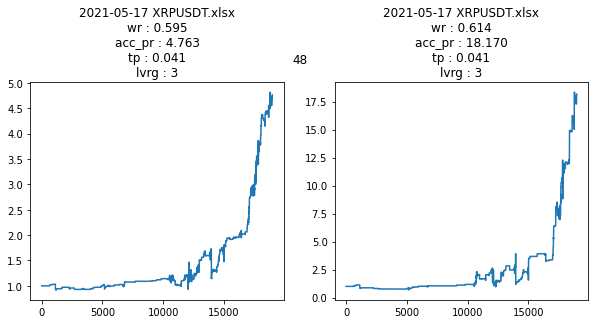

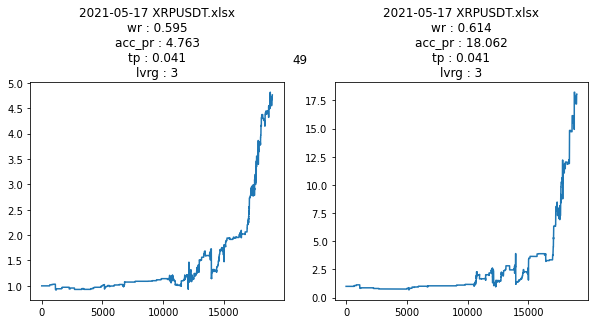

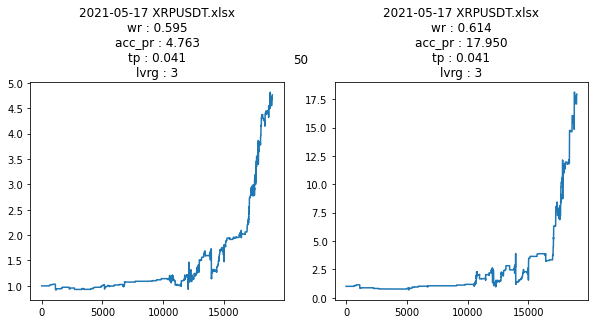

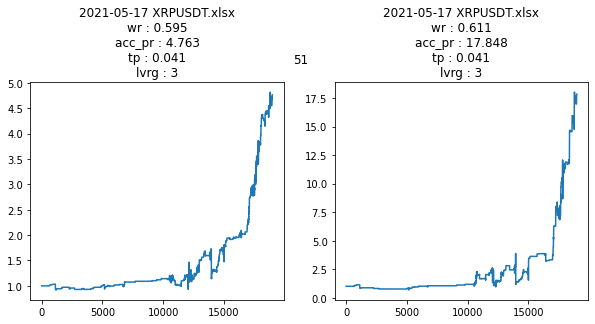

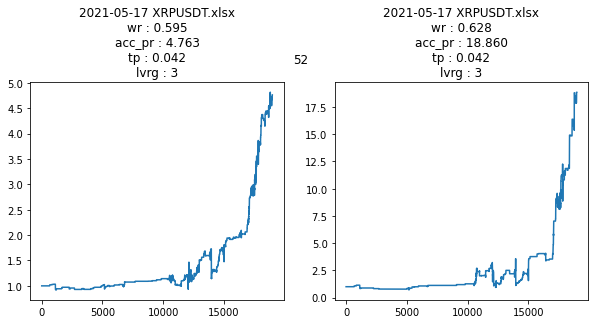

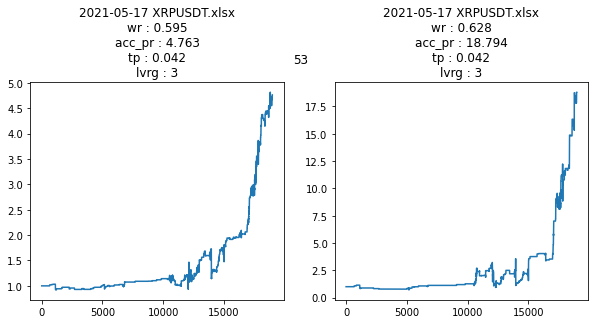

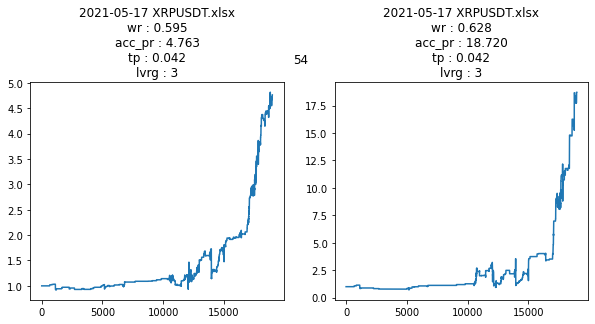

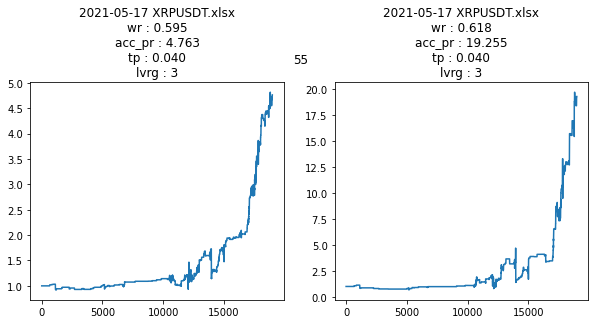

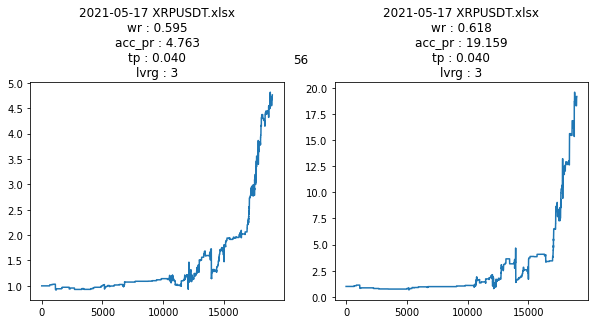

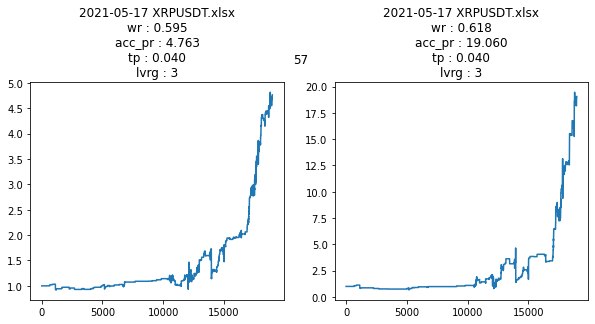

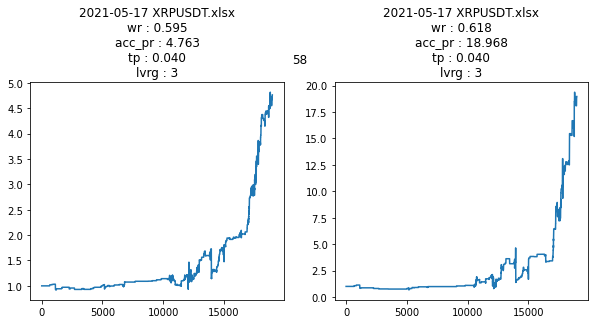

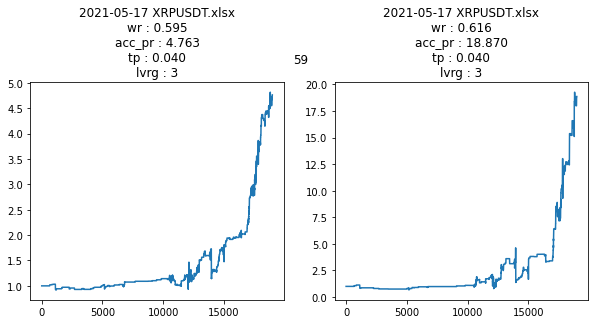

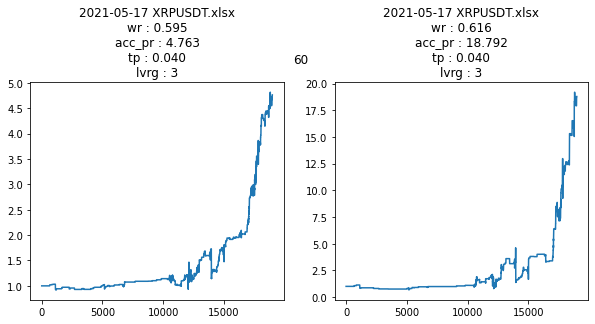

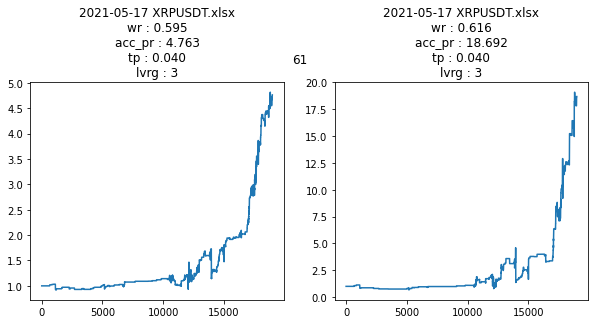

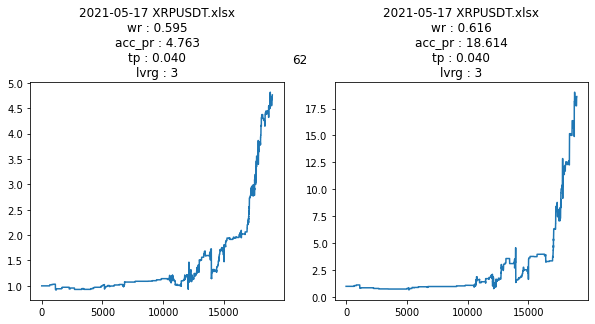

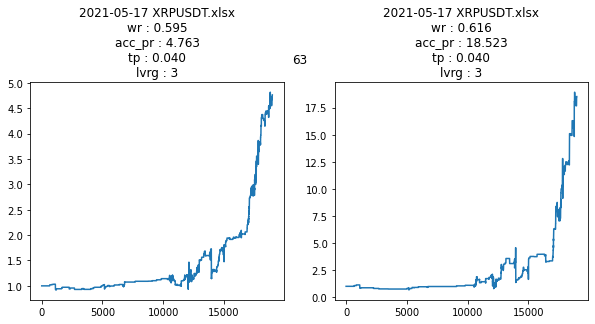

KeyboardInterrupt: ignored

In [ ]:
from tqdm.notebook import tqdm
from funcs_indicator import *
import matplotlib.pyplot as plt

# import mpl_finance as mf


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


start_stamp = 0
# start_stamp = datetime.timestamp(pd.to_datetime('2021-02-12'))
print("start_stamp :", start_stamp)
# break

np.random.shuffle(file_list)
candis = file_list

prev_x = None
total_x = None

seed = 1
random_state = 201
np.random.seed(seed)

fee = 0.0006
lvrg = 1

tp_list = np.arange(0.0, 0.05, 0.001)
lvrg_list = range(1, 10)
lvrg_list = range(3, 4)

for i in tqdm(range(len(candis))):

  keys = [candis[i]]

  if 'xrp'.upper() not in candis[i]:
    continue

  for key in keys:  
    
    ohlcv = pd.read_excel(date_path + key, index_col=0)
    print('len(ohlcv) :', len(ohlcv))
    
    fluc = ohlcv['high'] / ohlcv['low']

    for ma_period in range(2, 100):
      # ma_period = 10
      fluc_ma = fluc.rolling(ma_period).mean()

      #     find best lvrg with lq    #
      for lvrg in lvrg_list:
        
        #       tp opt      #
        best_tp = None
        best_ap = 0
        best_pr2 = None

        #        find best tp       #
        for tp in tp_list:

          long_ep = ohlcv['close'].shift(1) * (1 / (fluc_ma.shift(1) * tp + 1))

          #       long      #
          pr = (ohlcv['close'] / long_ep - fee - 1) * lvrg + 1
          #     set condition   #
          pr = np.where(ohlcv['low'] < long_ep, pr, 1)
        
          lq = (ohlcv['low'] / long_ep - fee - 1) * lvrg + 1

          # plt.plot(np.cumprod(pr))
          # plt.show()
          # break

          #       short       #
          # s_pr = (-ohlcv['close'].pct_change() - fee) * lvrg + 1

          #       fill na with 1.0      #
          pr = np.where(np.isnan(pr), 1, pr)
          # avoid_pr = np.where(np.isnan(avoid_pr), 1, avoid_pr)
          lq = np.where(np.isnan(lq), 1, lq)
          # s_pr = np.where(np.isnan(s_pr), 1, pr)

          #       set lq      #
          pr = np.where((pr != 1) & (lq <= 0), 0, pr)
          # avoid_pr = np.where((avoid_pr != 1) & (lq <= 0), 0, avoid_pr)

          # plt.plot(np.cumprod(pr))
          # plt.title("%.3f" % tp)
          # plt.show()
          # plt.close()

          ap = np.cumprod(pr)[-1]
          if ap >= best_ap:
            best_ap = ap
            best_tp = tp
            best_pr2 = pr

        best_pr2 = np.array(best_pr2)
        org_wr2 = len(best_pr2[best_pr2 > 1]) / len(best_pr2[best_pr2 != 1])

        plt.figure(figsize=(10, 4))

        plt.suptitle(ma_period)

        plt.subplot(121)
        plt.plot(np.cumprod(best_pr))
        plt.title("%s\nwr : %.3f\nacc_pr : %.3f\ntp : %.3f\nlvrg : %s" % (key, org_wr, np.cumprod(best_pr)[-1], best_tp, lvrg))
        
        plt.subplot(122)
        plt.plot(np.cumprod(best_pr2))
        plt.title("%s\nwr : %.3f\nacc_pr : %.3f\ntp : %.3f\nlvrg : %s" % (key, org_wr2, np.cumprod(best_pr2)[-1], best_tp, lvrg))
        
        plt.show()








### sl cut parts

In [ ]:
plt.plot(np.cumprod(test_pr))
plt.show()

#                  sl cut                #
for period in range(200, 201):
  
  sl_line = ohlcv['low'].rolling(period).min()
  # sl_line = long_ep * 0.7
  # sl_line = ohlcv['low'].shift(1)
  sl_pr = 1 + lvrg * (sl_line / long_ep - 1 - fee)
  # plt.plot(sl_pr)
  # plt.show()
  # # break

  # plt.plot(test_pr)
  # plt.show()
  test_pr_sl = np.where((test_pr != 1) & (sl_line > ohlcv['low']) & (1 > sl_line), sl_pr, test_pr)

  # plt.plot(test_pr_sl)
  # plt.show()
  # break

  wr_sl = len(test_pr_sl[test_pr_sl > 1]) / len(test_pr_sl[test_pr_sl != 1])

  # plt.subplot(122)
  plt.plot(np.cumprod(test_pr_sl))
  plt.title("%s\norg_wr : %.3f\n wr : %.5f\nacc_pr : %.3f\nperiod : %s" % (key, org_wr, wr_sl, np.cumprod(test_pr_sl)[-1], period))
  plt.show()
